### Load libraries

In [13]:
library(tidyverse)
library(stringr)
library(microViz)
library(metagMisc)
library(phylosignal)
library(ggplot2)
library(ggsci)
library(viridis)
library(conflicted)
library(gridExtra)
library(vegan)
library(ape)
library(lattice)
library(permute)
library(grid) 
library(knitr)
library(phyloseq)

In [54]:
library(cowplot)

```{r, echo=FALSE, results='hide'}
opts_chunk$set(cache=FALSE,warning=FALSE)
```

### Setup for plot labels

In [ ]:
```{r setup, include=FALSE}
options(repr.matrix.max.rows = 30, repr.matrix.max.cols = 20)

### Setup labels

In [7]:
#Setup for label sizes in plots
labels.x=theme(axis.title.x = element_text(size=18),
               axis.text.x = element_text(size=18,vjust=1,hjust=1,angle=45))

labels.x.pca=theme(axis.title.x = element_text(size=18),
               axis.text.x = element_text(size=18)) 

labels.y=theme(axis.title.y = element_text(size=18),
               axis.text.y= element_text(size=18))

labels.legend=theme(legend.text = element_text (size=18),
                    legend.title = element_text(size=18))

### Declare conflict preferences

In [8]:
conflict_prefer("filter","dplyr")
conflict_prefer("rename","dplyr")
conflict_prefer("mutate","dplyr")
conflict_prefer("count","dplyr")

[conflicted] Will prefer dplyr::filter over any other package.
[conflicted] Will prefer dplyr::rename over any other package.
[conflicted] Will prefer dplyr::mutate over any other package.
[conflicted] Will prefer dplyr::count over any other package.


## Phyloseq analyses

In [9]:
nonrare.psAll.filt = readRDS("nonrare.psAll.filt.rds")

In [10]:
nonrare.psAll.filt

phyloseq-class experiment-level object
otu_table()   OTU Table:         [ 1454 taxa and 779 samples ]
sample_data() Sample Data:       [ 779 samples by 10 sample variables ]
tax_table()   Taxonomy Table:    [ 1454 taxa by 7 taxonomic ranks ]
phy_tree()    Phylogenetic Tree: [ 1454 tips and 1453 internal nodes ]

In [14]:
subset.host=subset_samples(nonrare.psAll.filt,biome_1=="Host-associated")

Found more than one class "phylo" in cache; using the first, from namespace 'phyloseq'

Also defined by ‘RNeXML’

Found more than one class "phylo" in cache; using the first, from namespace 'phyloseq'

Also defined by ‘RNeXML’

Found more than one class "phylo" in cache; using the first, from namespace 'phyloseq'

Also defined by ‘RNeXML’

Found more than one class "phylo" in cache; using the first, from namespace 'phyloseq'

Also defined by ‘RNeXML’

Found more than one class "phylo" in cache; using the first, from namespace 'phyloseq'

Also defined by ‘RNeXML’

Found more than one class "phylo" in cache; using the first, from namespace 'phyloseq'

Also defined by ‘RNeXML’

Found more than one class "phylo" in cache; using the first, from namespace 'phyloseq'

Also defined by ‘RNeXML’



In [300]:
subset.host

phyloseq-class experiment-level object
otu_table()   OTU Table:         [ 1454 taxa and 646 samples ]
sample_data() Sample Data:       [ 646 samples by 10 sample variables ]
tax_table()   Taxonomy Table:    [ 1454 taxa by 7 taxonomic ranks ]
phy_tree()    Phylogenetic Tree: [ 1454 tips and 1453 internal nodes ]

### Richness plots

In [18]:
values.plot=c("#e64b35b2","#4dbbd5b2","#00a087b2","#3c5488b2","#f39b7fb2","#8491b4b2")#,"#91d1c2b2","#dc0000b2","#7e6148b2")
breaks.plot=c("Actinopterygii","Amphibia","Aves","Mammalia","Plants","Reptilia")

In [328]:
richness.estimates.host=mutate(as_tibble(subset.host@sam_data),estimate_richness(subset.host, split = TRUE, measures = c("Observed","Chao1","Shannon","Simpson")))

In [329]:
head(richness.estimates.host)

Sample     Dataset      biome_0 biome_1         biome_2  biome_3         
1 ERS1065340 MGYS00000631 root    Host-associated Mammalia Digestive system
2 ERS1065341 MGYS00000631 root    Host-associated Mammalia Digestive system
3 ERS1065342 MGYS00000631 root    Host-associated Mammalia Digestive system
4 ERS1353918 MGYS00001254 root    Host-associated Mammalia Digestive system
5 ERS1353919 MGYS00001254 root    Host-associated Mammalia Digestive system
6 ERS1353920 MGYS00001254 root    Host-associated Mammalia Digestive system
  biome_4         family     category mammals  Observed Chao1    se.chao1
1 Stomach         Bovidae    Animal   Mammalia 472      674.6316 40.91785
2 Stomach         Bovidae    Animal   Mammalia 646      943.6923 55.38977
3 Stomach         Bovidae    Animal   Mammalia 476      647.5921 35.85286
4 Large intestine Cricetidae Animal   Mammalia 398      585.8947 47.74056
5 Large intestine Cricetidae Animal   Mammalia 463      687.3182 52.72154
6 Large intestine Cricetidae Animal   Mammalia 450      605.2778 36.62144
  Shannon  Simpson  
1 4.975994 0.9834630
2 5.290218 0.9891487
3 4.831241 0.9814581
4 4.181518 0.9302754
5 4.424884 0.9530480
6 4.318404 0.9558224

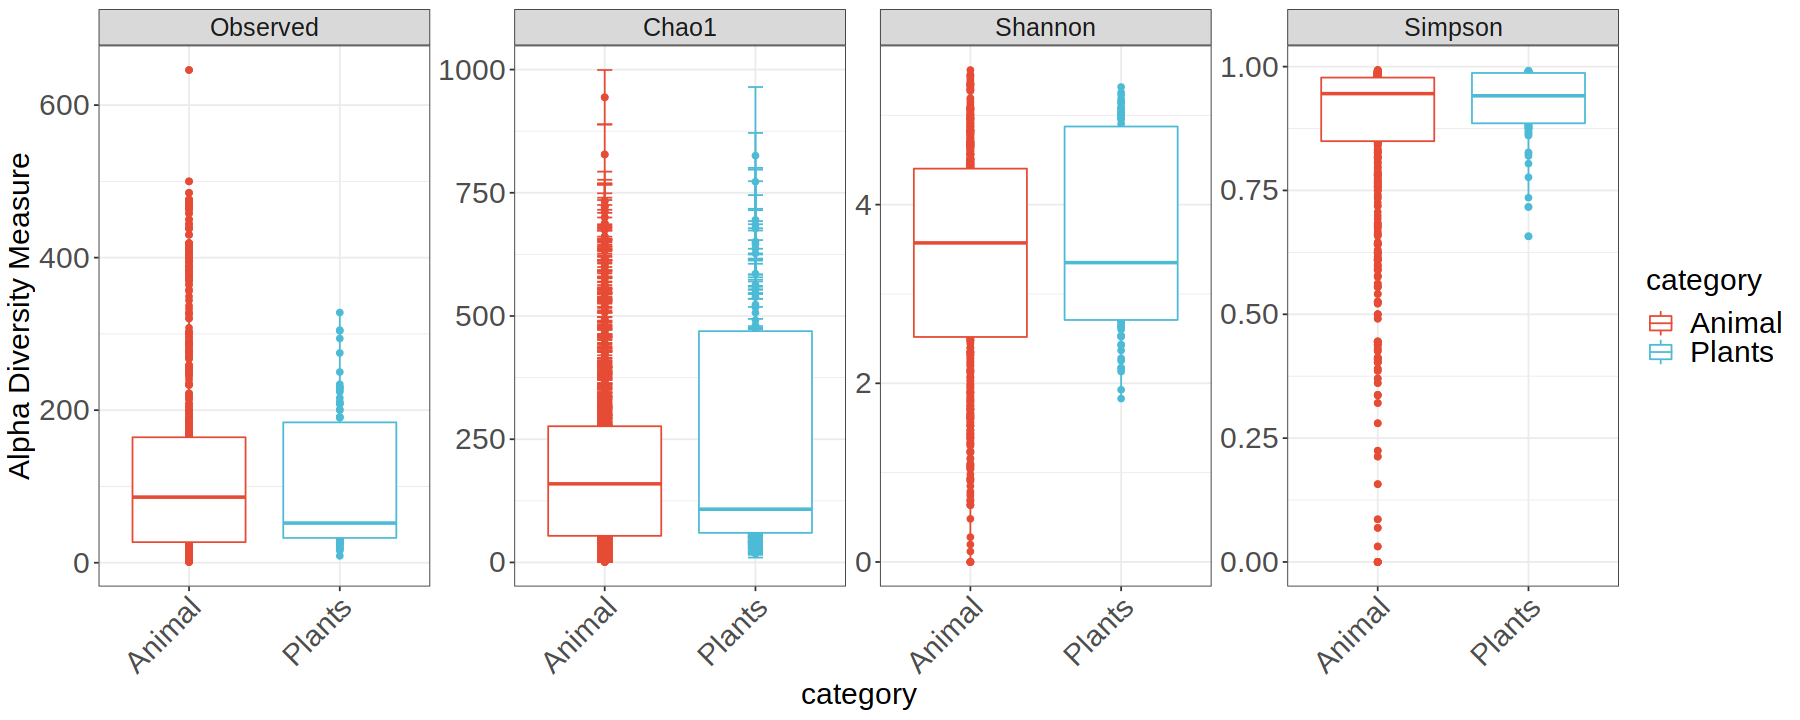

In [304]:
options(repr.plot.width=15,repr.plot.height=6)
plot_richness(subset.host,x="category",measures=c("Observed","Chao1","Shannon","Simpson"),color="category")+
geom_boxplot()+
theme_bw()+
scale_color_npg()+
labels.x+labels.y+labels.legend+
theme(strip.text=element_text(size=15))

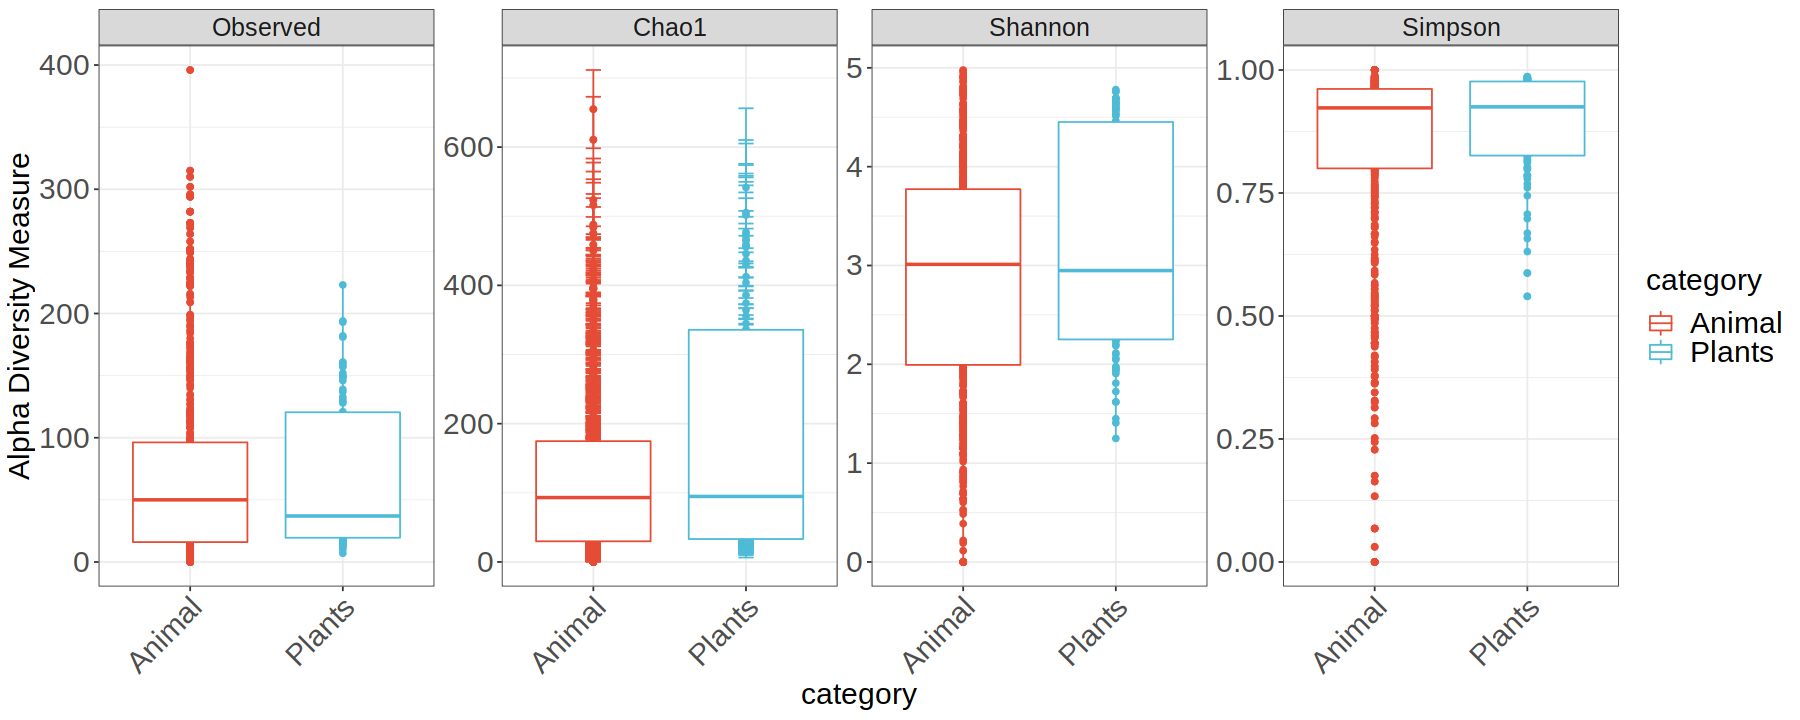

In [303]:
options(repr.plot.width=15,repr.plot.height=6)
plot_richness(subset.host,x="category",measures=c("Observed","Chao1","Shannon","Simpson"),color="category")+
geom_boxplot()+
theme_bw()+
scale_color_npg()+
labels.x+labels.y+labels.legend+
theme(strip.text=element_text(size=15))

### Statistics on richness estimates

#### I. Kruskal tests by category

In [22]:
kruskal.test(Observed~category,data=richness.estimates.host)


	Kruskal-Wallis rank sum test

data:  Observed by category
Kruskal-Wallis chi-squared = 0.023389, df = 1, p-value = 0.8784


In [23]:
kruskal.test(Chao1~category,data=richness.estimates.host)


	Kruskal-Wallis rank sum test

data:  Chao1 by category
Kruskal-Wallis chi-squared = 2.886, df = 1, p-value = 0.08935


In [24]:
kruskal.test(Shannon~category,data=richness.estimates.host)


	Kruskal-Wallis rank sum test

data:  Shannon by category
Kruskal-Wallis chi-squared = 4.5335, df = 1, p-value = 0.03324


In [25]:
kruskal.test(Simpson~category,data=richness.estimates.host)


	Kruskal-Wallis rank sum test

data:  Simpson by category
Kruskal-Wallis chi-squared = 3.2077, df = 1, p-value = 0.07329


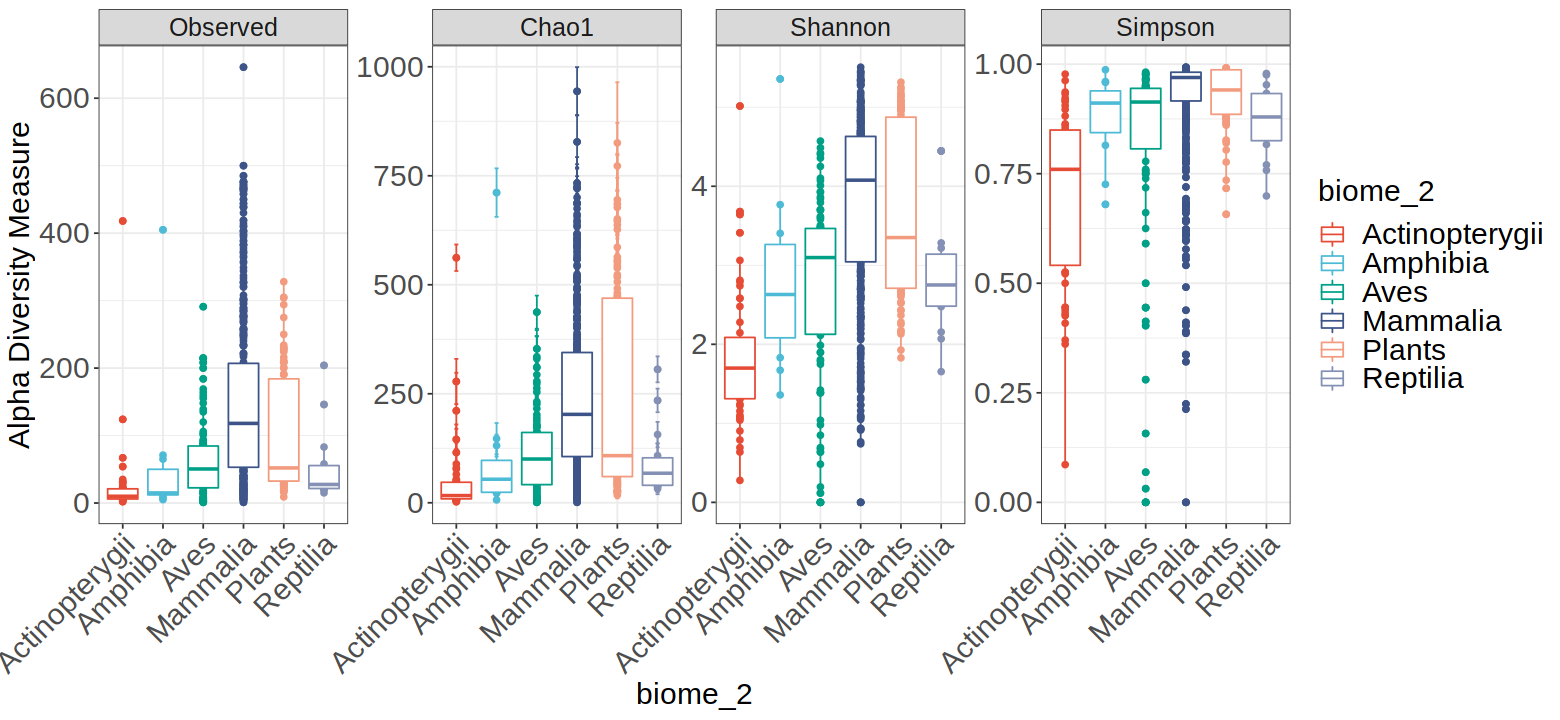

In [305]:
options(repr.plot.width=13,repr.plot.height=6)
plot_richness(subset.host,x="biome_2",measures=c("Observed","Chao1","Shannon","Simpson"),color="biome_2")+
geom_boxplot()+
scale_color_npg()+#scale_color_manual(values=values.plot,breaks=breaks.plot)+
labels.x+labels.y+labels.legend+
theme(strip.text=element_text(size=15))

#### II. Kruskal test by biome_2

In [27]:
dplyr::count(richness.estimates.host,biome_2)

biome_2        n  
1 Actinopterygii  53
2 Amphibia        11
3 Aves           100
4 Mammalia       394
5 Plants          87
6 Reptilia        14

In [28]:
kruskal.test(Observed~biome_2,data=richness.estimates.host)


	Kruskal-Wallis rank sum test

data:  Observed by biome_2
Kruskal-Wallis chi-squared = 122.16, df = 5, p-value < 2.2e-16


In [29]:
kruskal.test(Chao1~biome_2,data=richness.estimates.host)


	Kruskal-Wallis rank sum test

data:  Chao1 by biome_2
Kruskal-Wallis chi-squared = 112.7, df = 5, p-value < 2.2e-16


In [30]:
kruskal.test(Shannon~biome_2,data=richness.estimates.host)


	Kruskal-Wallis rank sum test

data:  Shannon by biome_2
Kruskal-Wallis chi-squared = 112.62, df = 5, p-value < 2.2e-16


In [31]:
kruskal.test(Simpson~biome_2,data=richness.estimates.host)


	Kruskal-Wallis rank sum test

data:  Simpson by biome_2
Kruskal-Wallis chi-squared = 82.635, df = 5, p-value = 2.356e-16


#### II. Wilcoxon test by biome_2

In [32]:
pairwise.wilcox.test(richness.estimates.host$Observed, 
                     richness.estimates.host$biome_2, 
                     p.adjust.method="fdr")

Warning message in wilcox.test.default(xi, xj, paired = paired, ...):
“cannot compute exact p-value with ties”



	Pairwise comparisons using Wilcoxon rank sum test with continuity correction 

data:  richness.estimates.host.filt$Observed and richness.estimates.host.filt$biome_2 

         Actinopterygii Amphibia Aves    Mammalia Plants
Amphibia 0.2330         -        -       -        -     
Aves     1.4e-06        0.2592   -       -        -     
Mammalia < 2e-16        0.0061   5.8e-09 -        -     
Plants   1.6e-14        0.0228   0.0188  0.0174   -     
Reptilia 0.0028         0.2924   0.5455  0.0043   0.0127

P value adjustment method: fdr 

In [33]:
pairwise.wilcox.test(richness.estimates.host$Chao1, 
                     richness.estimates.host$biome_2, 
                     p.adjust.method="fdr")


	Pairwise comparisons using Wilcoxon rank sum test with continuity correction 

data:  richness.estimates.host.filt$Chao1 and richness.estimates.host.filt$biome_2 

         Actinopterygii Amphibia Aves    Mammalia Plants
Amphibia 0.0806         -        -       -        -     
Aves     6.3e-07        0.2833   -       -        -     
Mammalia < 2e-16        0.0067   2.1e-08 -        -     
Plants   8.4e-13        0.0215   0.0039  0.6540   -     
Reptilia 0.0014         0.3974   0.5876  0.0058   0.0500

P value adjustment method: fdr 

In [34]:
pairwise.wilcox.test(richness.estimates.host$Shannon, 
                     richness.estimates.host$biome_2, 
                     p.adjust.method="fdr")


	Pairwise comparisons using Wilcoxon rank sum test with continuity correction 

data:  richness.estimates.host.filt$Shannon and richness.estimates.host.filt$biome_2 

         Actinopterygii Amphibia Aves    Mammalia Plants 
Amphibia 0.02872        -        -       -        -      
Aves     3.1e-05        0.92033  -       -        -      
Mammalia 5.7e-16        0.02872  2.0e-10 -        -      
Plants   1.5e-13        0.05012  0.00029 0.94429  -      
Reptilia 0.00029        0.76150  0.92033 0.01562  0.05012

P value adjustment method: fdr 

In [35]:
pairwise.wilcox.test(richness.estimates.host$Simpson, 
                     richness.estimates.host$biome_2, 
                     p.adjust.method="fdr")


	Pairwise comparisons using Wilcoxon rank sum test with continuity correction 

data:  richness.estimates.host.filt$Simpson and richness.estimates.host.filt$biome_2 

         Actinopterygii Amphibia Aves    Mammalia Plants
Amphibia 0.0344         -        -       -        -     
Aves     5.1e-05        0.7597   -       -        -     
Mammalia 2.9e-12        0.0485   4.3e-07 -        -     
Plants   1.6e-09        0.0978   0.0079  0.9810   -     
Reptilia 0.0079         0.9116   0.8609  0.0194   0.0682

P value adjustment method: fdr 

### Beta diversity

### 1. Ordination

In [36]:
jaccard.host.filt = ordinate(subset.host,distance="jaccard",method="PCoA")
unifrac.host.filt = ordinate(subset.host,distance="unifrac",method="PCoA")
bray.host.filt = ordinate(subset.host,distance="bray",method="PCoA")
wunifrac.host.filt = ordinate(subset.host,distance="wunifrac",method="PCoA")

### 2. Plots

Define functions

In [37]:
#Function to plot specificing ordination matrix and mapping value
plot_color_continuous = function(physeq_obj,ordination.matrix,color_by,axes = NULL){
    #Define axes to plot
    if(is.null(axes)){
        axes = 1:2 
    }

    #Get the name of the metric for the plot title
    metric = deparse(substitute(ordination.matrix))
    title = strsplit(metric,".",fixed=TRUE)[[1]][1]
    title = paste(toupper(substr(title,1,1)),substr(title,2,nchar(title)),sep = "")
    #str_to_title(title) --> doesn't work, stringr package corrupt, meanwhile use another option
    #Create ordination plot
    ordination.plot  = plot_ordination(
                 physeq = physeq_obj,
                 ordination = ordination.matrix,
                 type = "samples",
                 color = color_by,
                 axes = axes)+
                theme_bw()+
                geom_point(size = 3)+
                theme(legend.position = "top")+
                scale_color_viridis() +
                ggtitle(title)+
                theme(plot.title = element_text(hjust = 0.5))+
                labels.x + labels.y + labels.legend
    return(ordination.plot)
    
}

In [38]:
#Function to plot specificing ordination matrix and mapping value
plot_color_discrete = function(physeq_obj,ordination.matrix,color_by,axes = NULL){
    #Define axes to plot
    if(is.null(axes)){
        axes = 1:2 
    }

    #Get the name of the metric for the plot title
    metric = deparse(substitute(ordination.matrix))
    title = strsplit(metric,".",fixed=TRUE)[[1]][1]
    title = paste(toupper(substr(title,1,1)),substr(title,2,nchar(title)),sep = "")
    #str_to_title(title) --> doesn't work, stringr package corrupt, meanwhile use another option
    #Create ordination plot
    ordination.plot  = plot_ordination(
                 physeq = physeq_obj,
                 ordination = ordination.matrix,
                 type = "samples",
                 color = color_by,
                 axes = axes)+
                theme_bw()+
                geom_point(size = 3)+
                theme(legend.position = "top")+
                scale_color_npg() +
                ggtitle(title)+
                theme(plot.title = element_text(hjust = 0.5))+
                labels.x + labels.y + labels.legend
    return(ordination.plot)
    
}

In [307]:
plot_grid_pcoa = function(input.ord,ord.plot)
{
#Ordination vectors
ord.vector = as.data.frame(input.ord$vectors) %>% 
rownames_to_column(var="Sample")%>%
inner_join(richness.estimates.host)

#PCoA
pcoa.plot = ord.plot+
theme(legend.position="bottom")+
labs(title=NULL)+
labels.x + labels.y
    
#Density plot for x axis
axis1 = ggplot(data=ord.vector, aes(x=Axis.1,fill=category))+
    geom_density(alpha=0.5)+
    scale_fill_npg()+
    theme_void()+
    guides(fill="none")+theme(axis.title.x=element_blank(),
				axis.text=element_blank(),
				axis.line=element_blank(),
				axis.ticks=element_blank())

#Density plot for y axis
axis2 = ggplot(data=ord.vector, aes(x=Axis.2,fill=category))+
geom_density(alpha=0.5)+
    scale_fill_npg()+
    theme_void()+
    guides(fill="none")+coord_flip()+theme(axis.title.y=element_blank(),
				axis.text=element_blank(),
				axis.line=element_blank(),
				axis.ticks=element_blank())

#Subpanels
jaccard.axis1 = axis1 + theme(plot.margin = unit(c(0.5, -0.5, 0, 1.7), "cm"))
jaccard.cat = pcoa.plot + theme(plot.margin = unit(c(0, 0, 0.5, 0.5), "cm"))
jaccard.axis2 = axis2 + theme(plot.margin = unit(c(-0.6, 0.5, 2.7, 0), "cm"))

#Grids for each panel
axis1 = plot_grid(axis1, pcoa.plot, ncol = 1, rel_heights = c(1, 3))
axis2 = plot_grid(NULL, axis2, ncol = 1, rel_heights = c(1, 3))
 
    pcoa.plot.grid = plot_grid(axis1, axis2, ncol = 2, rel_widths = c(3, 1))
    return(pcoa.plot.grid)
}

#### By category

In [39]:
jaccard.plot = plot_color_discrete(subset.host,jaccard.host.filt,"category")
bray.plot = plot_color_discrete(subset.host,bray.host.filt,"category")
unifrac.plot = plot_color_discrete(subset.host,unifrac.host.filt,"category")
wunifrac.plot = plot_color_discrete(subset.host,wunifrac.host.filt,"category")


Joining, by = "Sample"
Joining, by = "Sample"
Joining, by = "Sample"
Joining, by = "Sample"


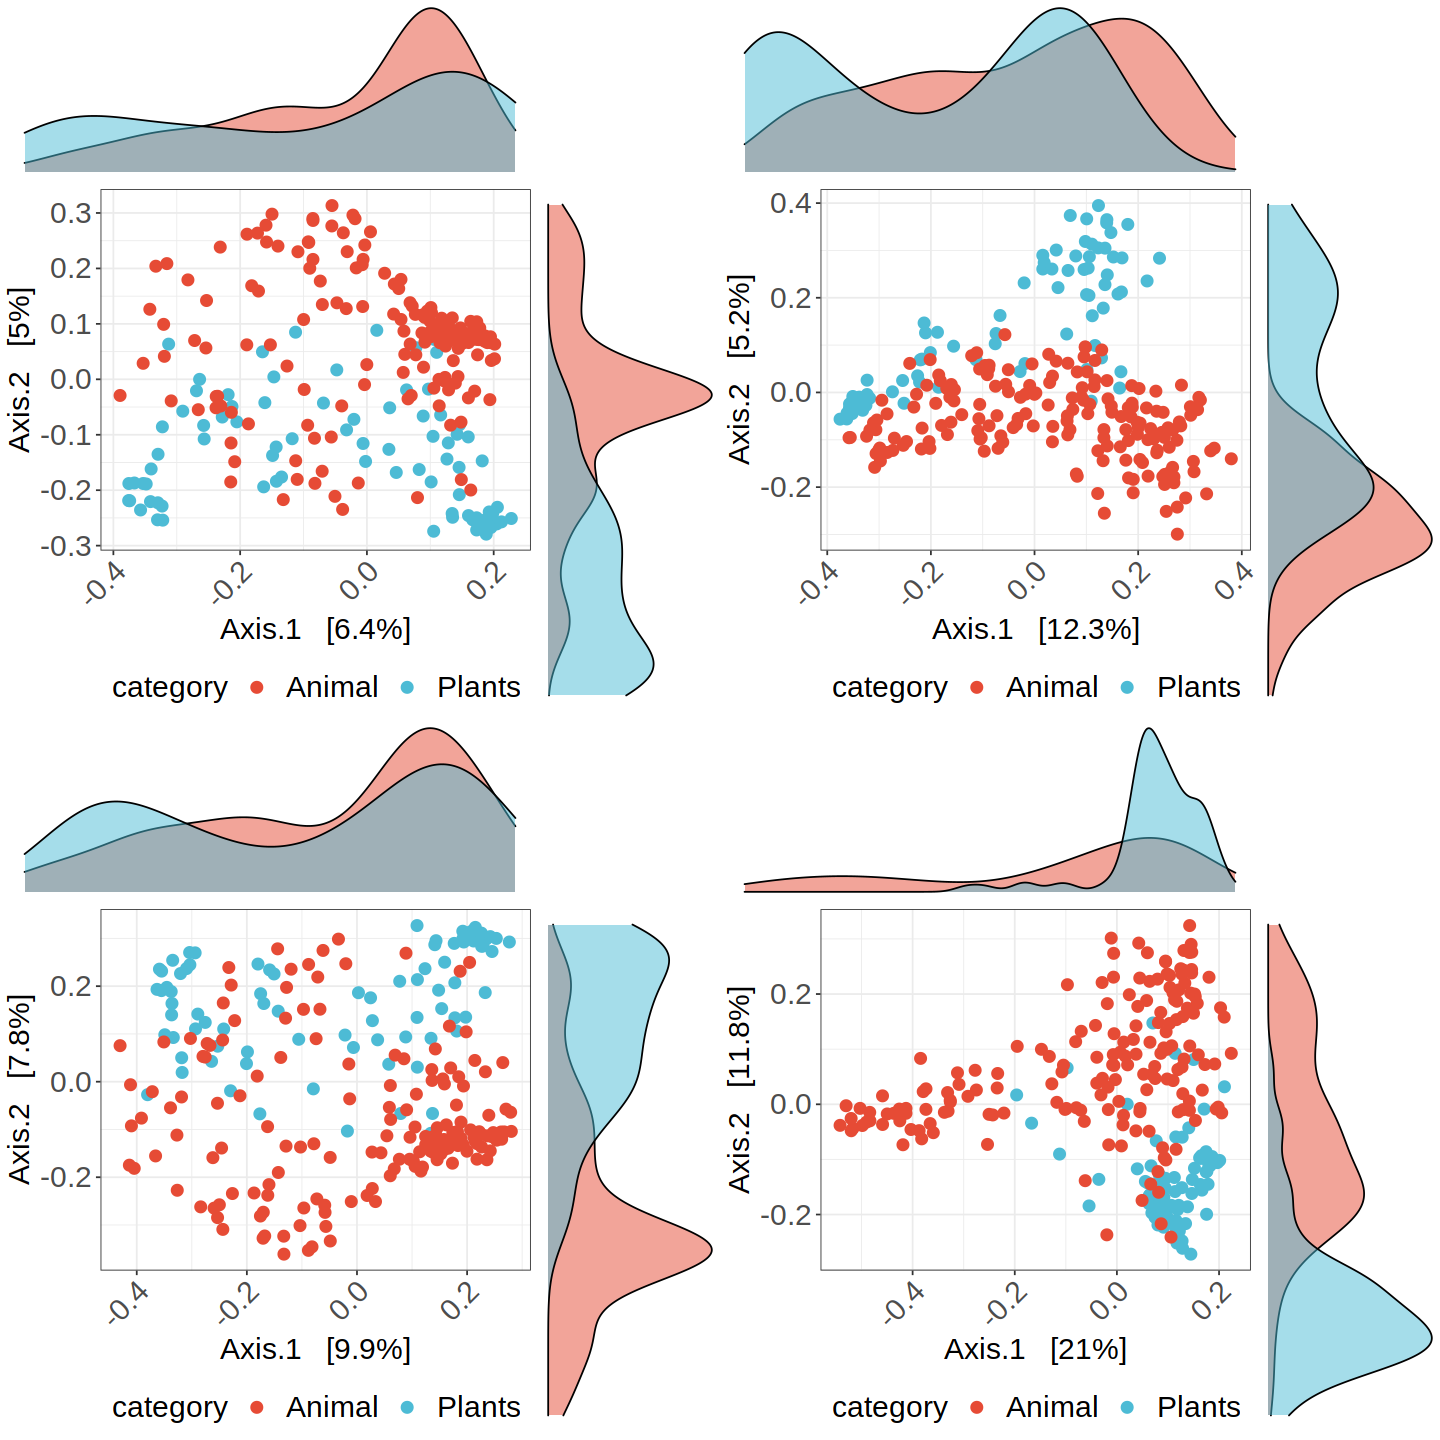

In [141]:
options(repr.plot.width=12,repr.plot.height=12)
grid.arrange(plot_grid_pcoa(jaccard.host,jaccard.plot),
            plot_grid_pcoa(unifrac.host,unifrac.plot),
            plot_grid_pcoa(bray.host,bray.plot),
            plot_grid_pcoa(wunifrac.host,wunifrac.plot),
            nrow=2)


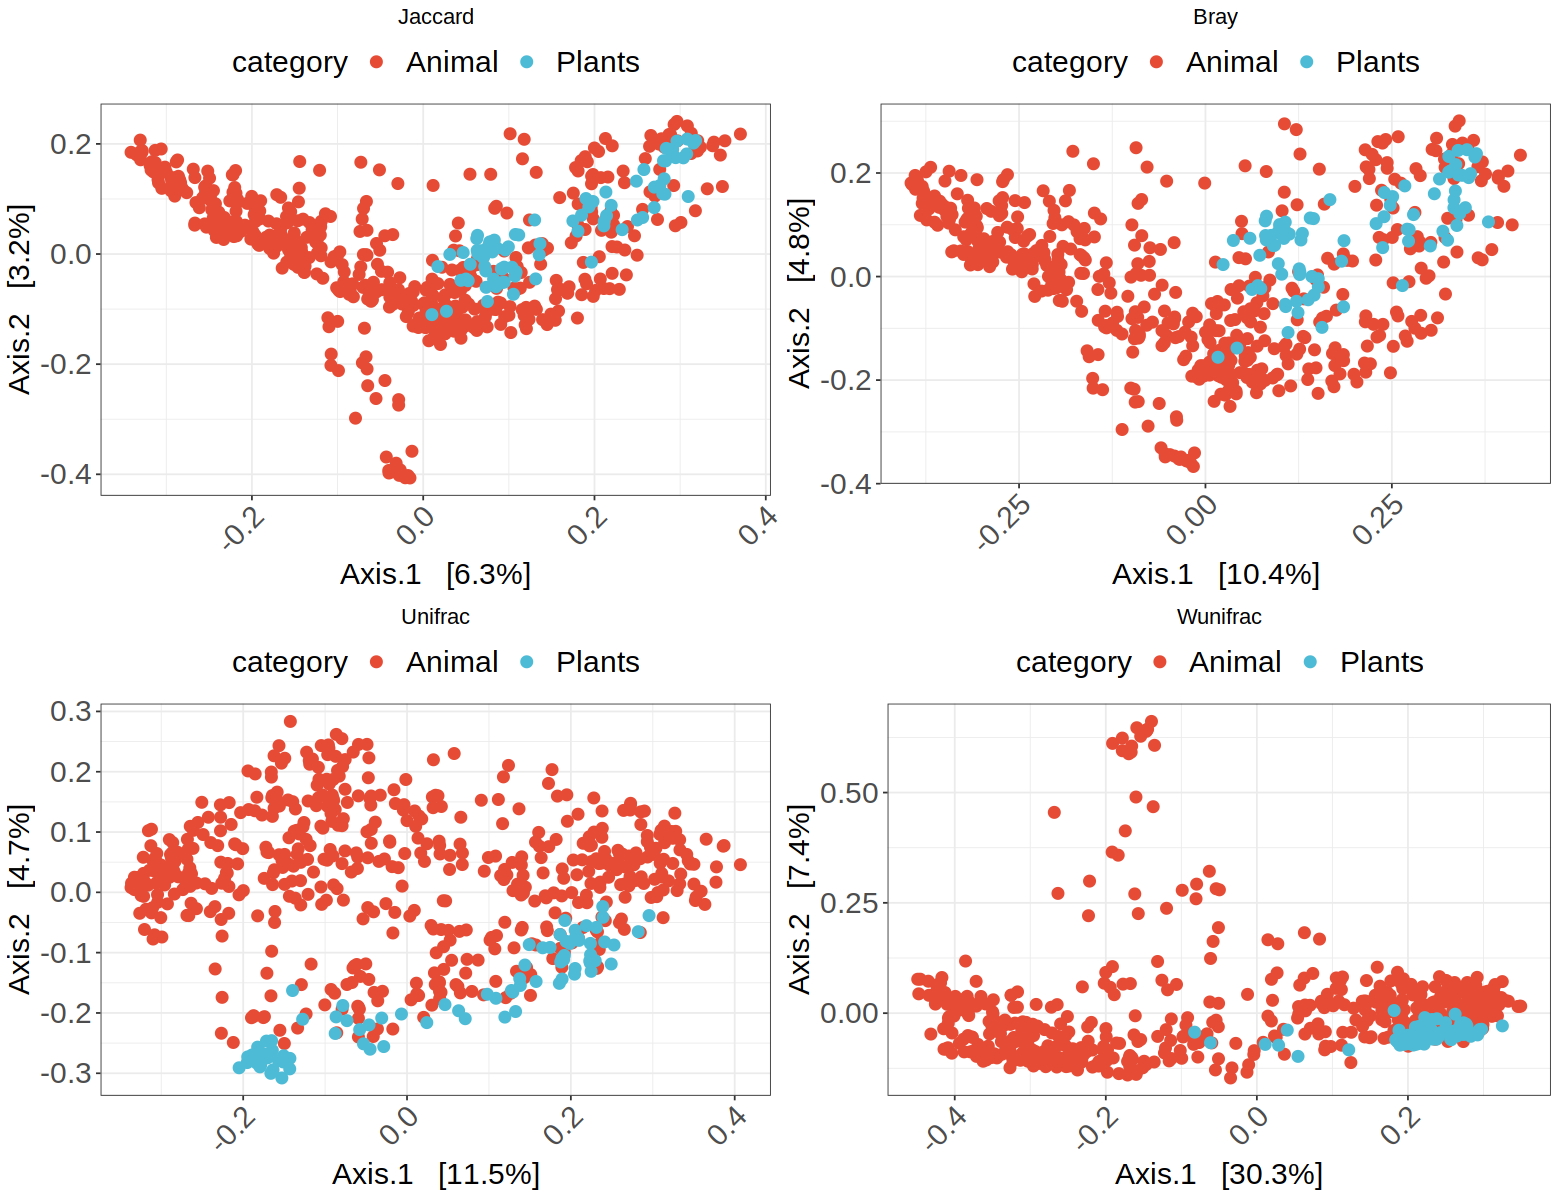

In [40]:
options(repr.plot.width=13,repr.plot.height=10)
grid.arrange(jaccard.plot,
             bray.plot,
             unifrac.plot,
             wunifrac.plot,
             nrow=2)

#### By biome_2

In [307]:
plot_grid_pcoa_biome2 = function(input.ord,ord.plot)
{
#Ordination vectors
ord.vector = as.data.frame(input.ord$vectors) %>% 
rownames_to_column(var="Sample")%>%
inner_join(richness.estimates.host)

#PCoA
pcoa.plot = ord.plot+
theme(legend.position="bottom")+
labs(title=NULL)+
labels.x + labels.y
    
#Density plot for x axis
axis1 = ggplot(data=ord.vector, aes(x=Axis.1,fill=biome_2))+
    geom_density(alpha=0.5)+
    scale_fill_npg()+
    theme_void()+
    guides(fill="none")+theme(axis.title.x=element_blank(),
				axis.text=element_blank(),
				axis.line=element_blank(),
				axis.ticks=element_blank())

#Density plot for y axis
axis2 = ggplot(data=ord.vector, aes(x=Axis.2,fill=biome_2))+
geom_density(alpha=0.5)+
    scale_fill_npg()+
    theme_void()+
    guides(fill="none")+coord_flip()+theme(axis.title.y=element_blank(),
				axis.text=element_blank(),
				axis.line=element_blank(),
				axis.ticks=element_blank())

#Subpanels
jaccard.axis1 = axis1 + theme(plot.margin = unit(c(0.5, -0.5, 0, 1.7), "cm"))
jaccard.cat = pcoa.plot + theme(plot.margin = unit(c(0, 0, 0.5, 0.5), "cm"))
jaccard.axis2 = axis2 + theme(plot.margin = unit(c(-0.6, 0.5, 2.7, 0), "cm"))

#Grids for each panel
axis1 = plot_grid(axis1, pcoa.plot, ncol = 1, rel_heights = c(1, 3))
axis2 = plot_grid(NULL, axis2, ncol = 1, rel_heights = c(1, 3))
 
    pcoa.plot.grid = plot_grid(axis1, axis2, ncol = 2, rel_widths = c(3, 1))
    return(pcoa.plot.grid)
}

In [132]:
jaccard.plot.biome2 = plot_color_discrete(subset.host,jaccard.host.filt,"biome_2")
bray.plot.biome2 = plot_color_discrete(subset.host,bray.host.filt,"biome_2")
unifrac.plot.biome2 = plot_color_discrete(subset.host,unifrac.host.filt,"biome_2")
wunifrac.plot.biome2 = plot_color_discrete(subset.host,wunifrac.host.filt,"biome_2")


Joining, by = "Sample"
Joining, by = "Sample"
Joining, by = "Sample"
Joining, by = "Sample"


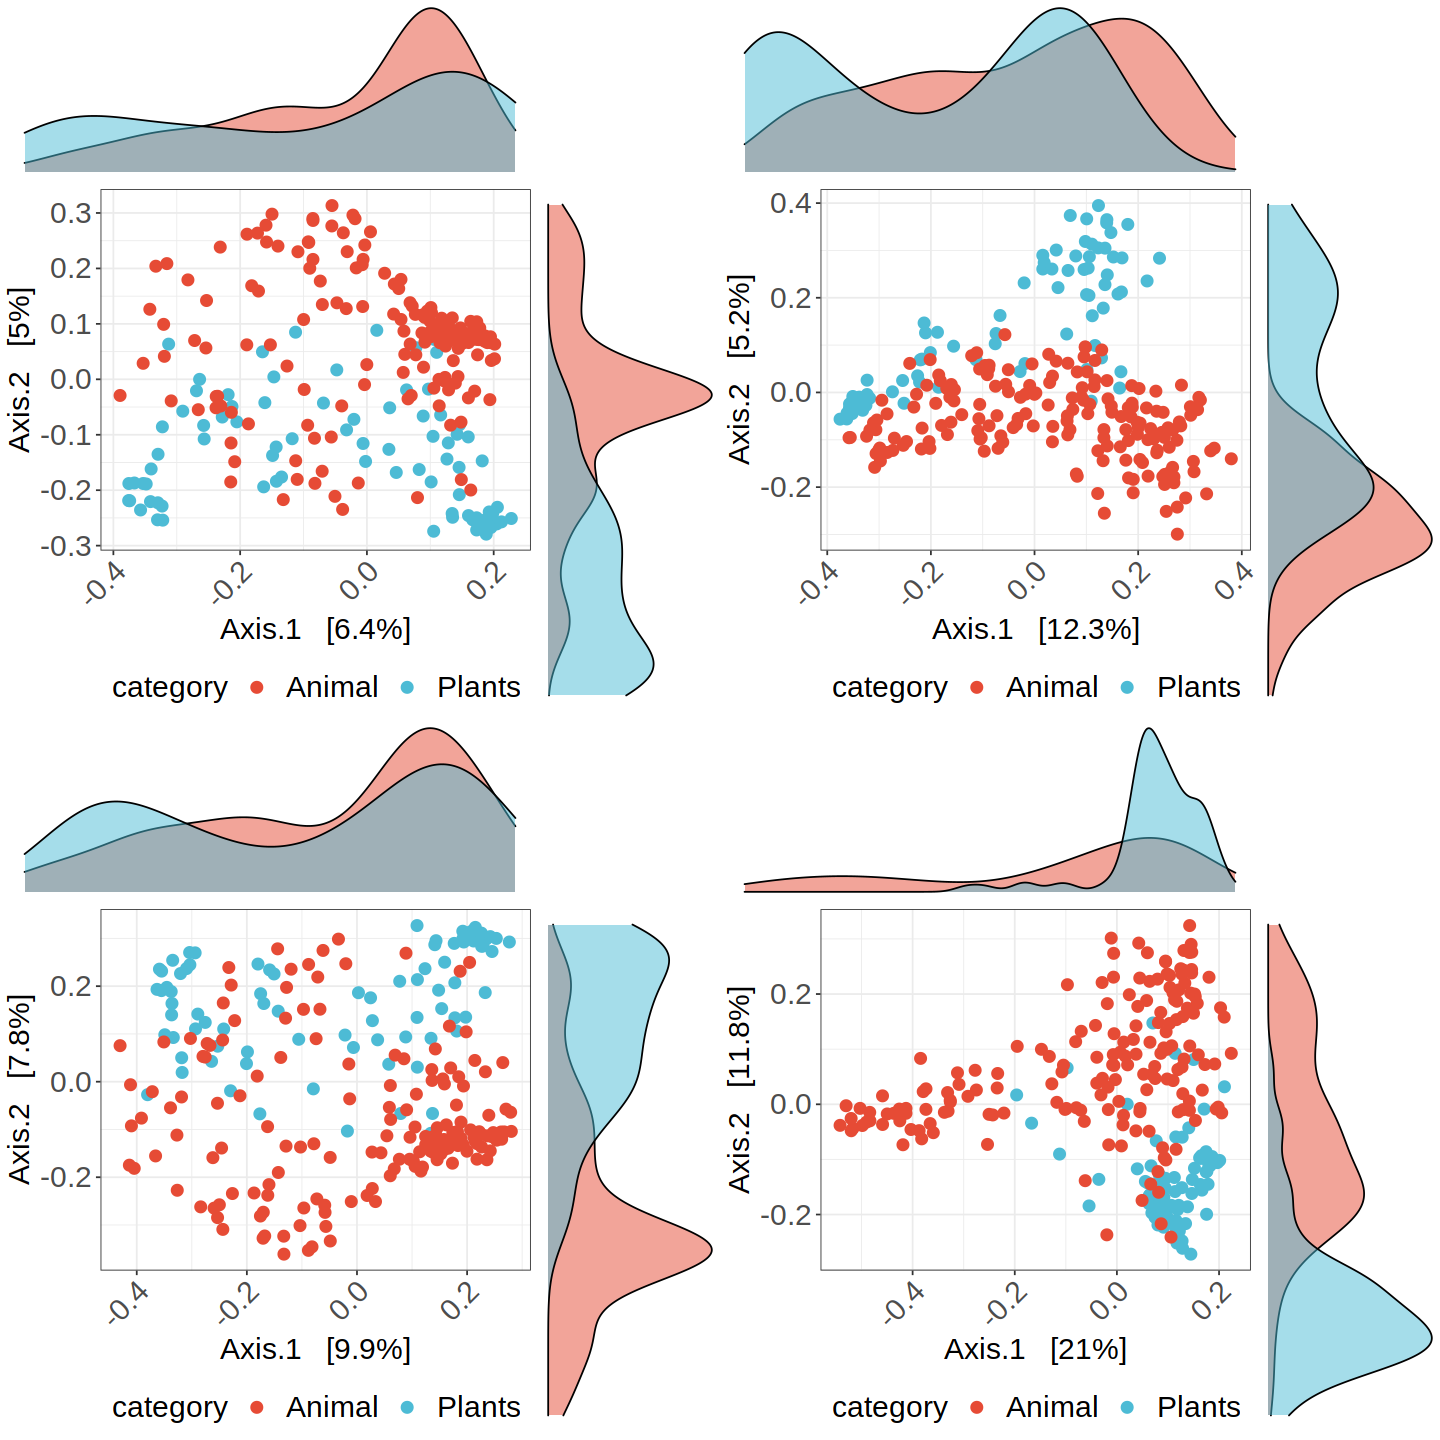

In [141]:
options(repr.plot.width=12,repr.plot.height=12)
grid.arrange(plot_grid_pcoa_biome2(jaccard.host,jaccard.plot.biome2),
            plot_grid_pcoa_biome2(unifrac.host,unifrac.plot.biome2),
            plot_grid_pcoa_biome2(bray.host,bray.plot.biome2),
            plot_grid_pcoa_biome2(wunifrac.host,wunifrac.plot.biome2),
            nrow=2)


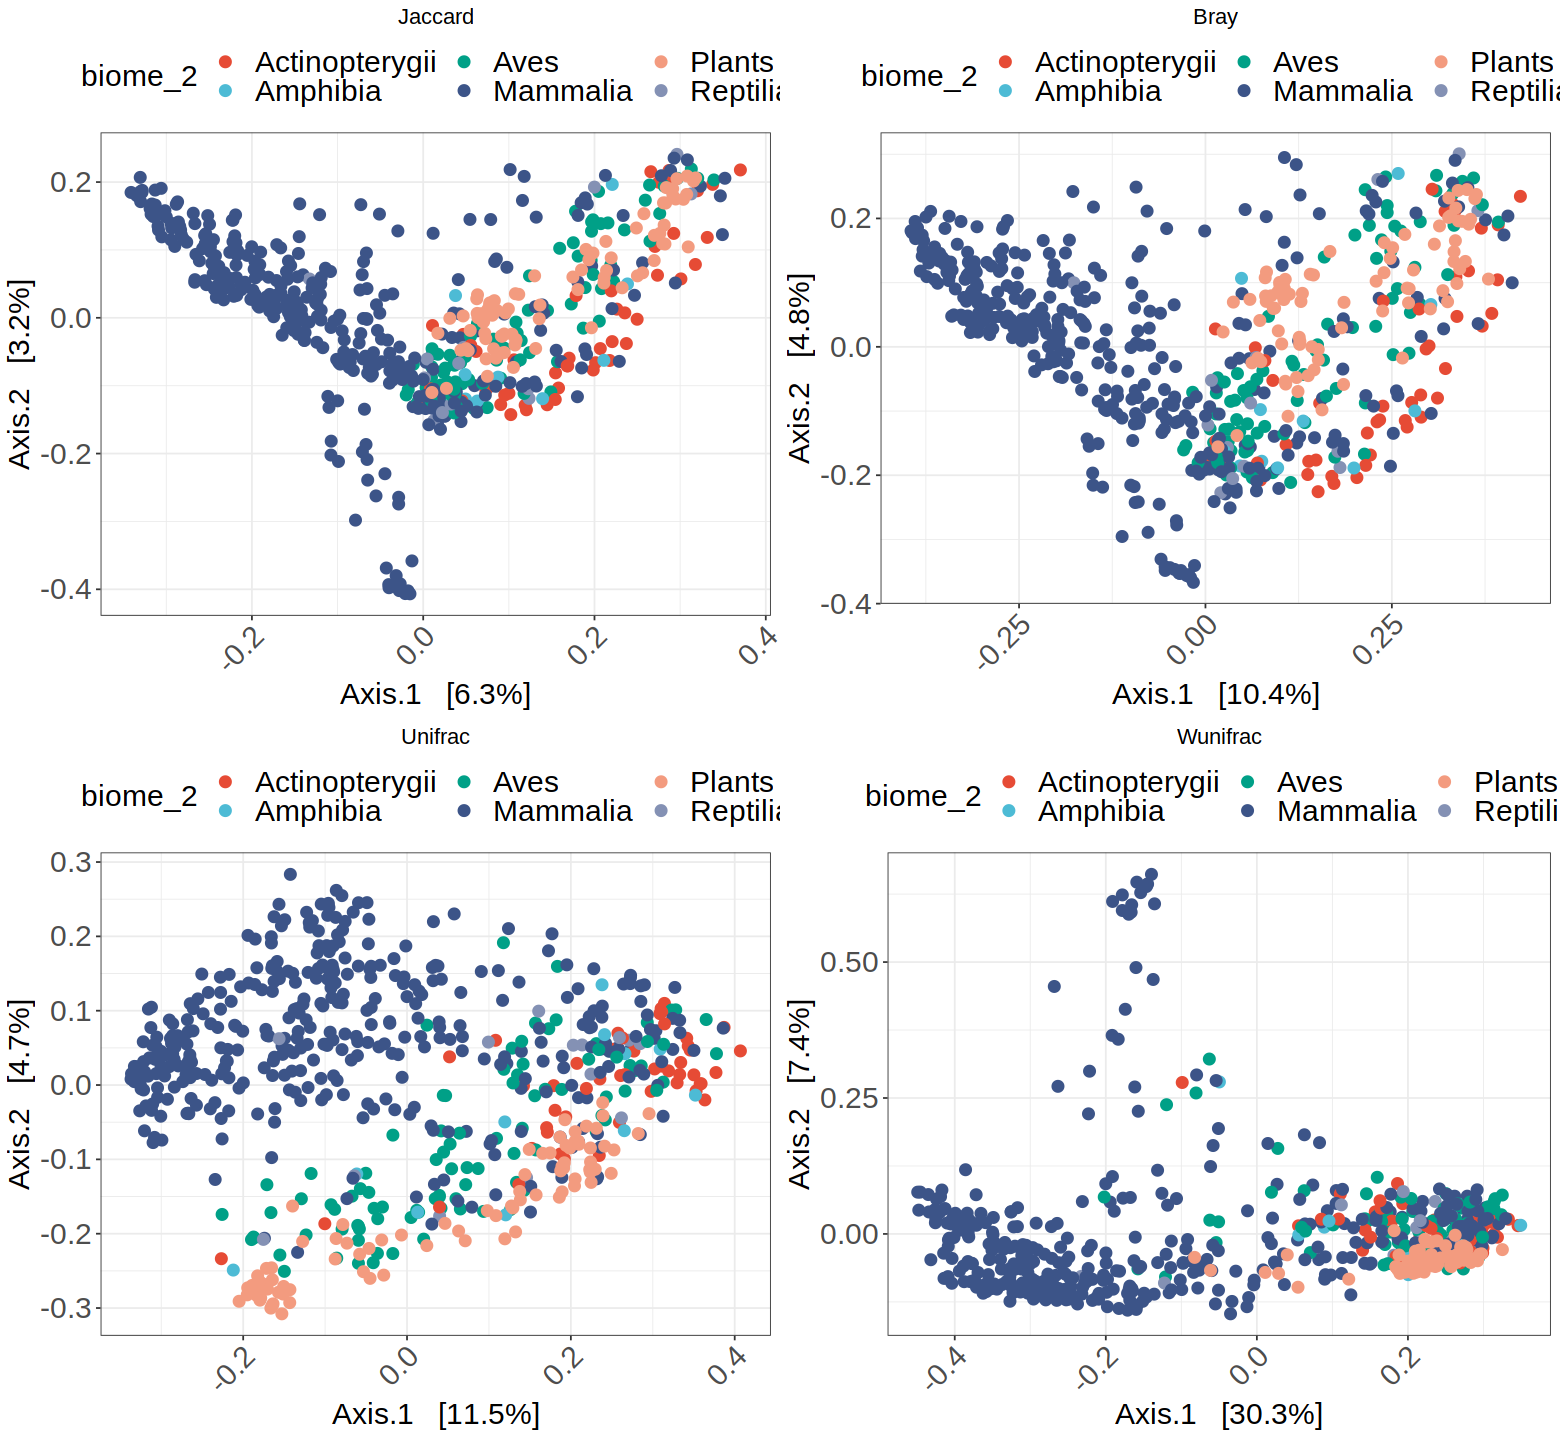

In [133]:
options(repr.plot.width=13,repr.plot.height=12)
grid.arrange(jaccard.plot.biome2,
             bray.plot.biome2,
             unifrac.plot.biome2,
             wunifrac.plot.biome2,
             nrow=2)

#### Mammals vs. non-mammals

In [309]:
#subset.host.filt.no.mammals = subset_samples(subset.host,biome_2!="Mammalia")
subset.host.filt.animals=subset_samples(subset.host,category=="Animal")

Found more than one class "phylo" in cache; using the first, from namespace 'phyloseq'

Also defined by ‘RNeXML’

Found more than one class "phylo" in cache; using the first, from namespace 'phyloseq'

Also defined by ‘RNeXML’

Found more than one class "phylo" in cache; using the first, from namespace 'phyloseq'

Also defined by ‘RNeXML’

Found more than one class "phylo" in cache; using the first, from namespace 'phyloseq'

Also defined by ‘RNeXML’



In [310]:
subset.host.filt.animals

phyloseq-class experiment-level object
otu_table()   OTU Table:         [ 1454 taxa and 559 samples ]
sample_data() Sample Data:       [ 559 samples by 10 sample variables ]
tax_table()   Taxonomy Table:    [ 1454 taxa by 7 taxonomic ranks ]
phy_tree()    Phylogenetic Tree: [ 1454 tips and 1453 internal nodes ]

In [58]:
jaccard.animal.filt = ordinate(subset.host.filt.animals,distance="jaccard",method="PCoA")
unifrac.animal.filt = ordinate(subset.host.filt.animals,distance="unifrac",method="PCoA")
bray.animal.filt = ordinate(subset.host.filt.animals,distance="bray",method="PCoA")
wunifrac.animal.filt = ordinate(subset.host.filt.animals,distance="wunifrac",method="PCoA")

In [321]:
jaccard.plot.animals = plot_color_discrete(subset.host.filt.animals,jaccard.animal.filt,"mammals")
bray.plot.animals = plot_color_discrete(subset.host.filt.animals,bray.animal.filt,"mammals")
unifrac.plot.animals = plot_color_discrete(subset.host.filt.animals,unifrac.animal.filt,"mammals")
wunifrac.plot.animals = plot_color_discrete(subset.host.filt.animals,wunifrac.animal.filt,"mammals")

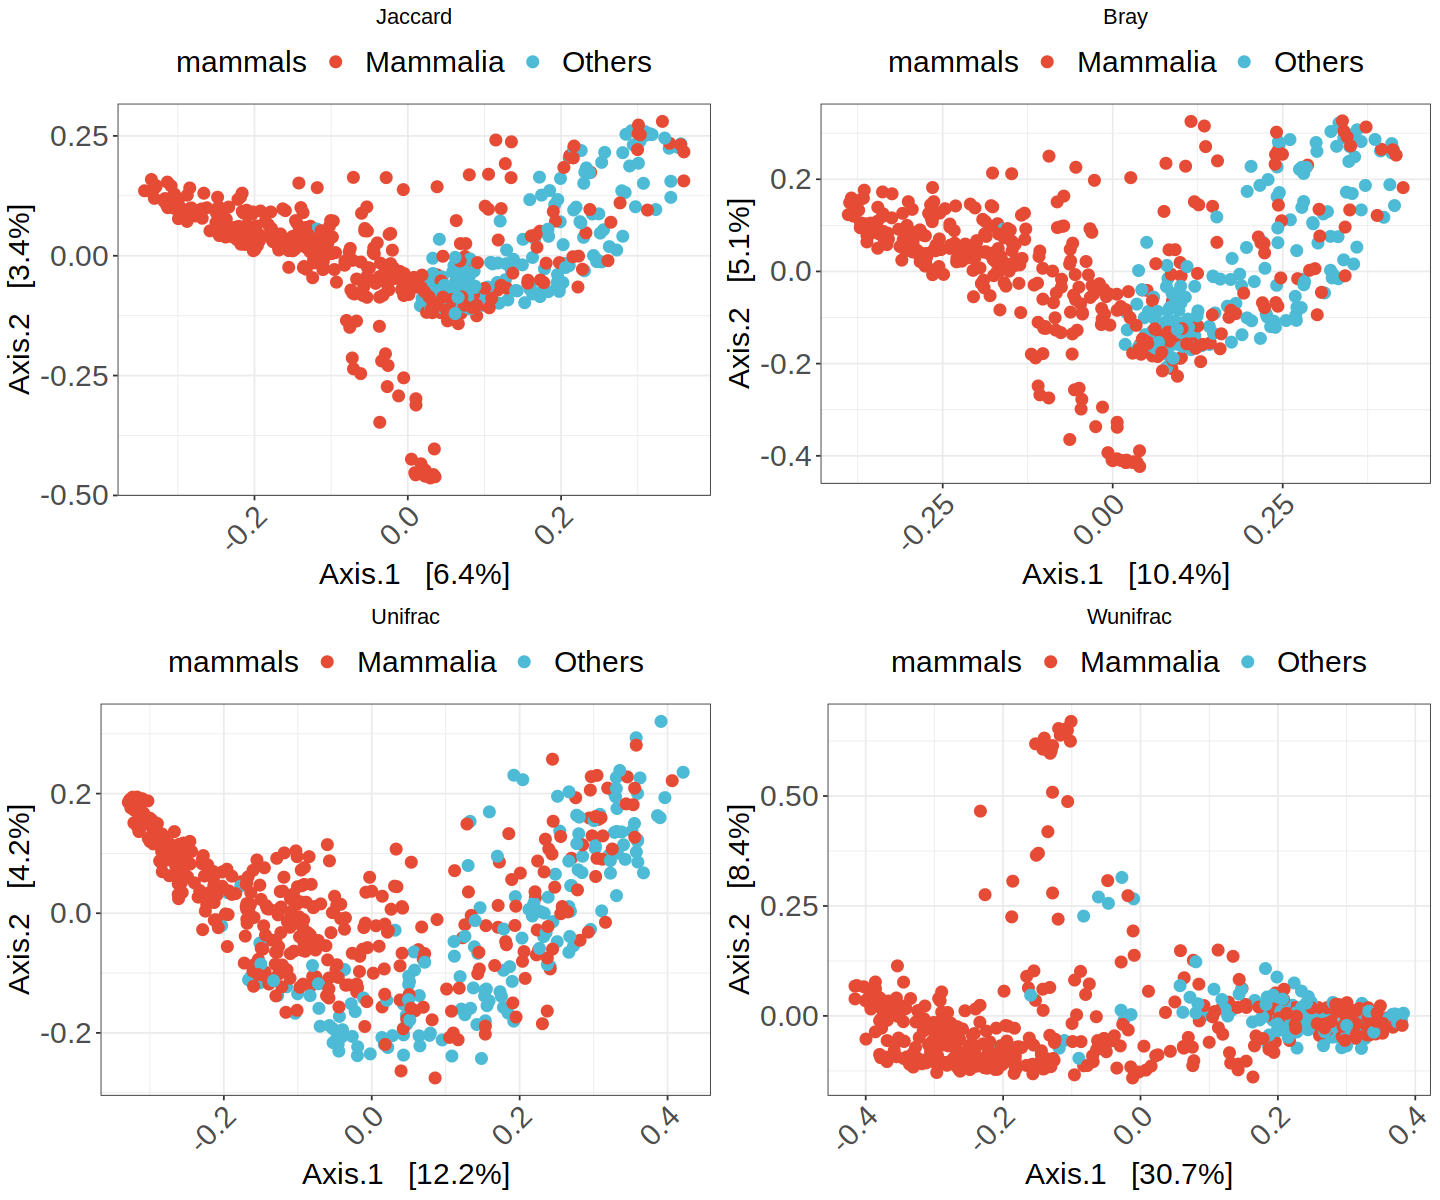

In [322]:
options(repr.plot.width=12,repr.plot.height=10)
grid.arrange(jaccard.plot.animals,
             bray.plot.animals,
             unifrac.plot.animals,
             wunifrac.plot.animals,
             nrow=2)

In [330]:
plot_grid_pcoa_mammals = function(input.ord,ord.plot)
{
#Ordination vectors
ord.vector = as.data.frame(input.ord$vectors) %>% 
rownames_to_column(var="Sample")%>%
inner_join(richness.estimates.host)

#PCoA
pcoa.plot = ord.plot+
theme(legend.position="bottom")+
labs(title=NULL)+
labels.x + labels.y
    
#Density plot for x axis
axis1 = ggplot(data=ord.vector, aes(x=Axis.1,fill=mammals))+
    geom_density(alpha=0.5)+
    scale_fill_npg()+
    theme_void()+
    guides(fill="none")+theme(axis.title.x=element_blank(),
				axis.text=element_blank(),
				axis.line=element_blank(),
				axis.ticks=element_blank())

#Density plot for y axis
axis2 = ggplot(data=ord.vector, aes(x=Axis.2,fill=mammals))+
geom_density(alpha=0.5)+
    scale_fill_npg()+
    theme_void()+
    guides(fill="none")+coord_flip()+theme(axis.title.y=element_blank(),
				axis.text=element_blank(),
				axis.line=element_blank(),
				axis.ticks=element_blank())

#Subpanels
jaccard.axis1 = axis1 + theme(plot.margin = unit(c(0.5, -0.5, 0, 1.7), "cm"))
jaccard.cat = pcoa.plot + theme(plot.margin = unit(c(0, 0, 0.5, 0.5), "cm"))
jaccard.axis2 = axis2 + theme(plot.margin = unit(c(-0.6, 0.5, 2.7, 0), "cm"))

#Grids for each panel
axis1 = plot_grid(axis1, pcoa.plot, ncol = 1, rel_heights = c(1, 3))
axis2 = plot_grid(NULL, axis2, ncol = 1, rel_heights = c(1, 3))
 
    pcoa.plot.grid = plot_grid(axis1, axis2, ncol = 2, rel_widths = c(3, 1))
    return(pcoa.plot.grid)
}

Joining, by = "Sample"
Joining, by = "Sample"
Joining, by = "Sample"
Joining, by = "Sample"


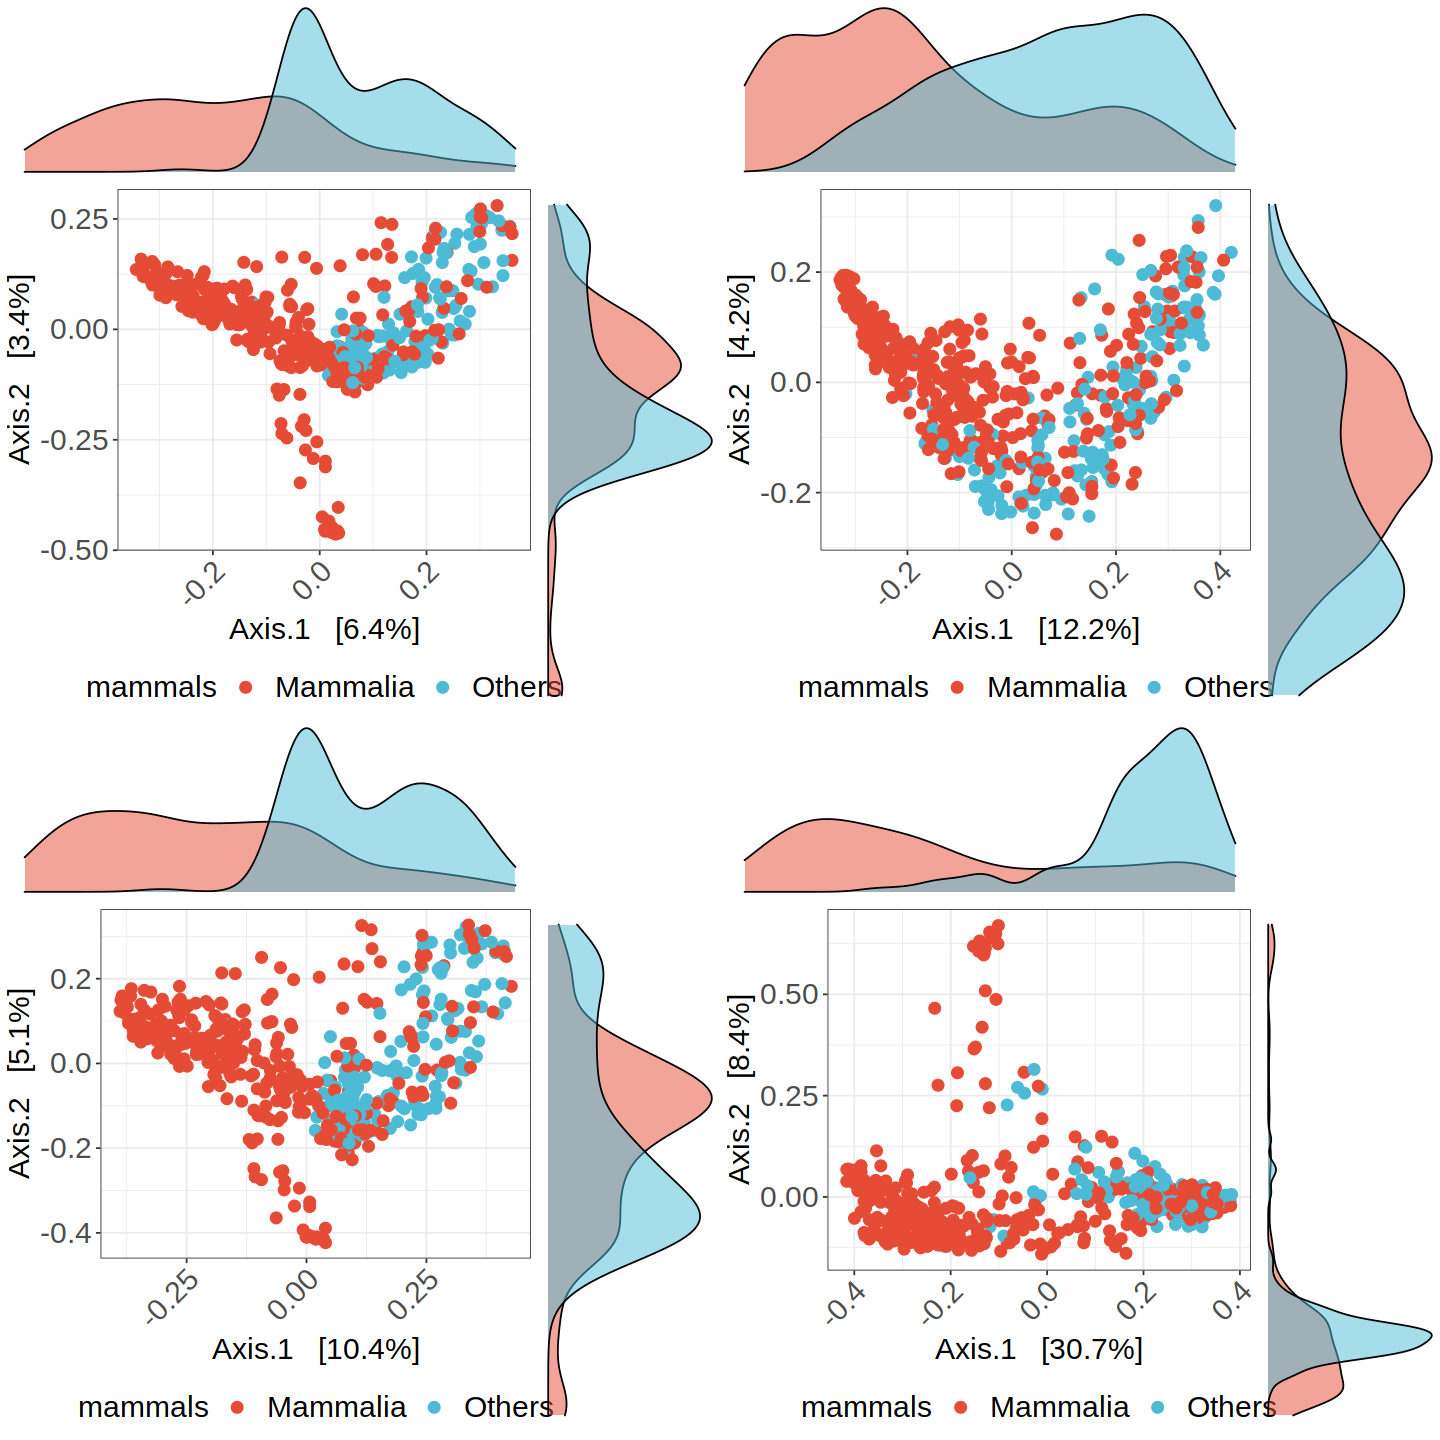

In [331]:
options(repr.plot.width=12,repr.plot.height=12)
grid.arrange(plot_grid_pcoa_mammals(jaccard.animal.filt,jaccard.plot.animals),
            plot_grid_pcoa_mammals(unifrac.animal.filt,unifrac.plot.animals),
            plot_grid_pcoa_mammals(bray.animal.filt,bray.plot.animals),
            plot_grid_pcoa_mammals(wunifrac.animal.filt,wunifrac.plot.animals),
            nrow=2)


### 3. Pairwise dissimilarity

#### By category

In [79]:
host.filt.diss.jacc1=phyloseq_group_dissimilarity(subset.host,group="category",method="jaccard",between_groups = TRUE)+ggtitle("Jaccard")+labels.x + labels.y + labels.legend+
theme(legend.position = "none")+scale_fill_npg()+theme(axis.text.x = element_text(angle=45))

host.filt.diss.unifrac1=phyloseq_group_dissimilarity(subset.host,group="category",method="unifrac",between_groups = TRUE)+ggtitle("uUniFrac")+labels.x + labels.y + labels.legend+
theme(legend.position = "none")+scale_fill_npg()+theme(axis.text.x = element_text(angle=45))

Found more than one class "phylo" in cache; using the first, from namespace 'phyloseq'

Also defined by ‘RNeXML’

Found more than one class "phylo" in cache; using the first, from namespace 'phyloseq'

Also defined by ‘RNeXML’

Found more than one class "phylo" in cache; using the first, from namespace 'phyloseq'

Also defined by ‘RNeXML’

Found more than one class "phylo" in cache; using the first, from namespace 'phyloseq'

Also defined by ‘RNeXML’



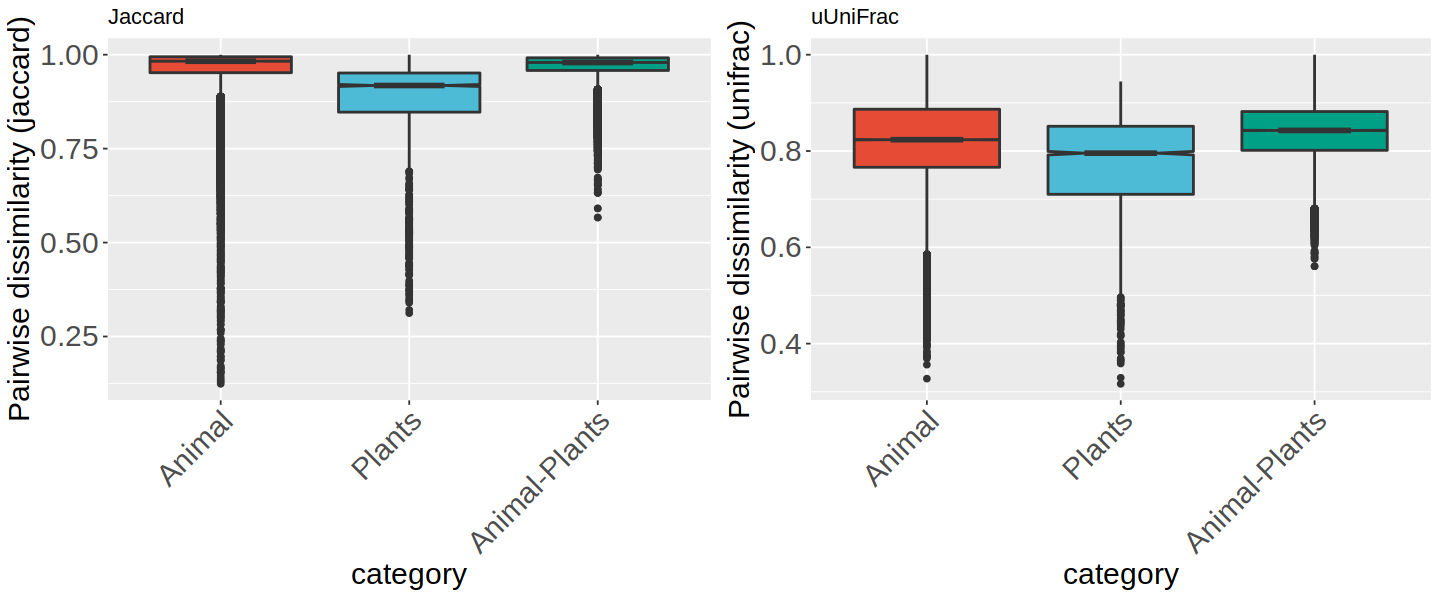

In [83]:
options(repr.plot.width=12,repr.plot.height=5)
grid.arrange(host.filt.diss.jacc1,
             host.filt.diss.unifrac1,
             nrow=1)

#### By biome_2

In [99]:
host.filt.diss.jacc2=phyloseq_group_dissimilarity(subset.host,group="biome_2",method="jaccard",between_groups = TRUE)+ggtitle("Jaccard")+labels.x + labels.y + labels.legend+
theme(legend.position = "none")+scale_fill_npg()+theme(axis.text.x = element_text(angle=45))

host.filt.diss.unifrac2=phyloseq_group_dissimilarity(subset.host,group="biome_2",method="unifrac",between_groups = TRUE)+ggtitle("uUniFrac")+labels.x + labels.y + labels.legend+
theme(legend.position = "none")+scale_fill_npg()+theme(axis.text.x = element_text(angle=45))

Found more than one class "phylo" in cache; using the first, from namespace 'phyloseq'

Also defined by ‘RNeXML’

Found more than one class "phylo" in cache; using the first, from namespace 'phyloseq'

Also defined by ‘RNeXML’

Found more than one class "phylo" in cache; using the first, from namespace 'phyloseq'

Also defined by ‘RNeXML’

Found more than one class "phylo" in cache; using the first, from namespace 'phyloseq'

Also defined by ‘RNeXML’

Found more than one class "phylo" in cache; using the first, from namespace 'phyloseq'

Also defined by ‘RNeXML’

Found more than one class "phylo" in cache; using the first, from namespace 'phyloseq'

Also defined by ‘RNeXML’

Warning message in vegdist(structure(c(0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, :
“you have empty rows: their dissimilarities may be
                 meaningless in method “jaccard””
Warning message in vegdist(structure(c(0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, :
“missing values in results”
Warning message in ve

Warning message:
“Removed 220 rows containing non-finite values (stat_boxplot).”
Warning message:
“This manual palette can handle a maximum of 10 values. You have supplied 21.”
Warning message:
“Removed 220 rows containing non-finite values (stat_boxplot).”
Warning message:
“This manual palette can handle a maximum of 10 values. You have supplied 21.”


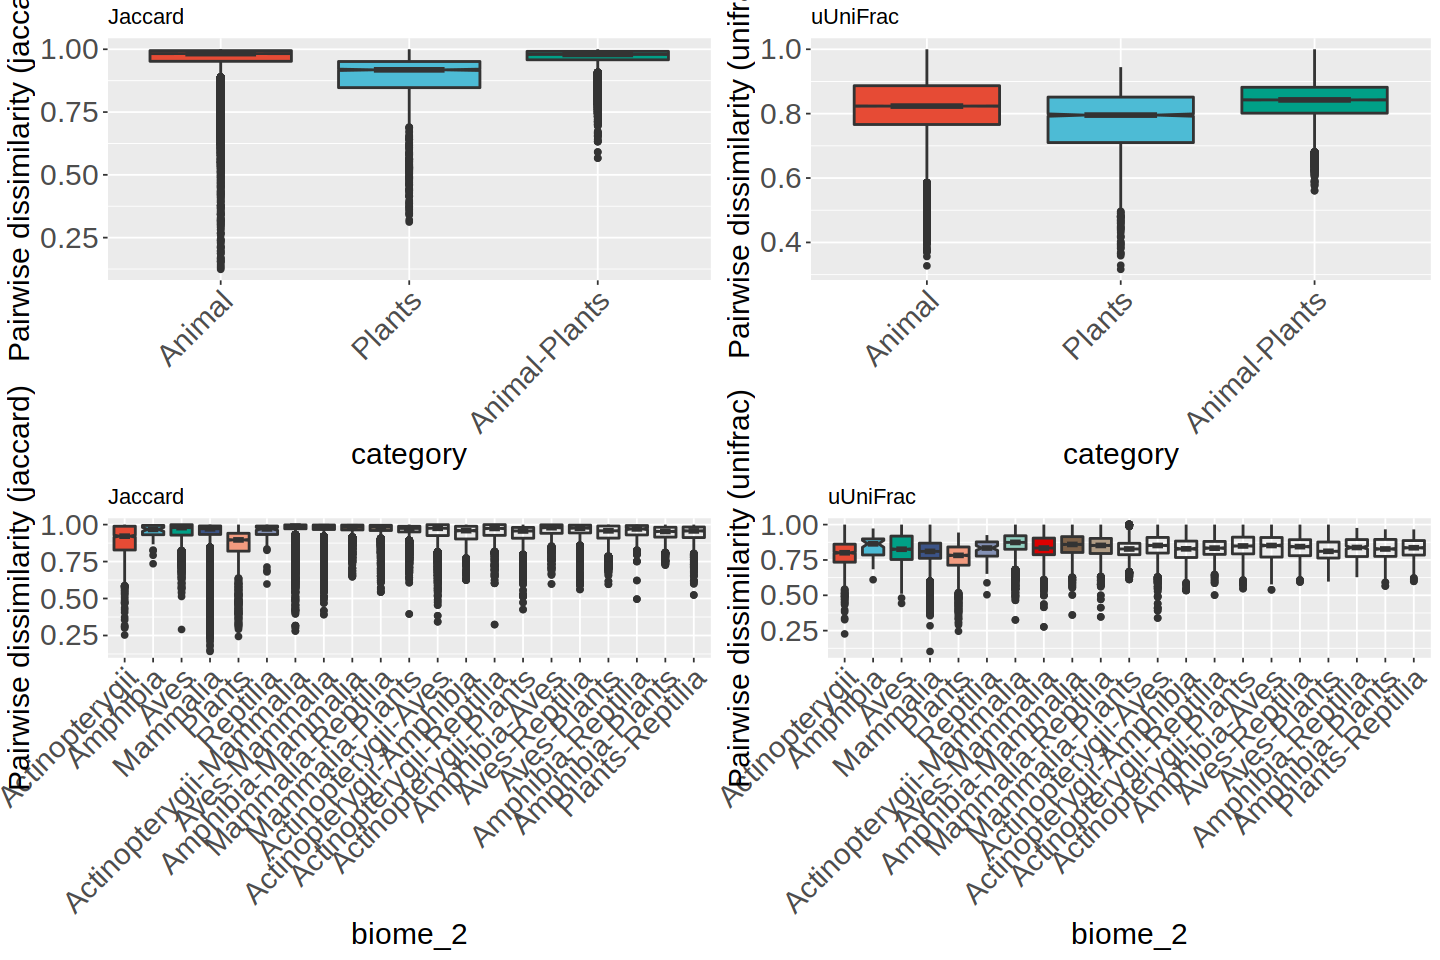

In [100]:
options(repr.plot.width=12,repr.plot.height=8)
grid.arrange(host.filt.diss.jacc1,
             host.filt.diss.unifrac1,
             host.filt.diss.jacc2,
             host.filt.diss.unifrac2,
             nrow=2)

In [138]:
host.tre.top=plot_tree(phyloseq_filter_top_taxa(subset.host,perc=10),color="category",label.tips="family")+scale_color_npg()

Found more than one class "phylo" in cache; using the first, from namespace 'phyloseq'

Also defined by ‘RNeXML’

Warning message in psmelt(physeq):
“The sample variables: 
Sample
 have been renamed to: 
sample_Sample
to avoid conflicts with special phyloseq plot attribute names.”
Found more than one class "phylo" in cache; using the first, from namespace 'phyloseq'

Also defined by ‘RNeXML’

Found more than one class "phylo" in cache; using the first, from namespace 'phyloseq'

Also defined by ‘RNeXML’

Found more than one class "phylo" in cache; using the first, from namespace 'phyloseq'

Also defined by ‘RNeXML’

Found more than one class "phylo" in cache; using the first, from namespace 'phyloseq'

Also defined by ‘RNeXML’



In [137]:
host.tre.top

ERROR: Error in eval(expr, envir, enclos): object 'host.tre.top' not found


In [139]:
tre.host.top.0.1=plot_tree(phyloseq_filter_top_taxa(subset.host,n=10),color="biome_2",label.tips='Phylum')+scale_color_npg()+ggtitle("Top 0.1%")

tre.host.top.1=plot_tree(phyloseq_filter_top_taxa(subset.host,n=30),color="biome_2",label.tips='Phylum')+scale_color_npg()+ggtitle("Top 1%")

tre.host.top.5=plot_tree(phyloseq_filter_top_taxa(subset.host,n=50),color="biome_2",label.tips='Phylum')+scale_color_npg()+ggtitle("Top 5%")

tre.host.top.10=plot_tree(phyloseq_filter_top_taxa(subset.host,n=100),color="biome_2",label.tips='Phylum')+scale_color_npg()+ggtitle("Top 10%")


Found more than one class "phylo" in cache; using the first, from namespace 'phyloseq'

Also defined by ‘RNeXML’

Warning message in psmelt(physeq):
“The sample variables: 
Sample
 have been renamed to: 
sample_Sample
to avoid conflicts with special phyloseq plot attribute names.”
Found more than one class "phylo" in cache; using the first, from namespace 'phyloseq'

Also defined by ‘RNeXML’

Found more than one class "phylo" in cache; using the first, from namespace 'phyloseq'

Also defined by ‘RNeXML’

Found more than one class "phylo" in cache; using the first, from namespace 'phyloseq'

Also defined by ‘RNeXML’

Found more than one class "phylo" in cache; using the first, from namespace 'phyloseq'

Also defined by ‘RNeXML’

Found more than one class "phylo" in cache; using the first, from namespace 'phyloseq'

Also defined by ‘RNeXML’

Warning message in psmelt(physeq):
“The sample variables: 
Sample
 have been renamed to: 
sample_Sample
to avoid conflicts with special phyloseq plo

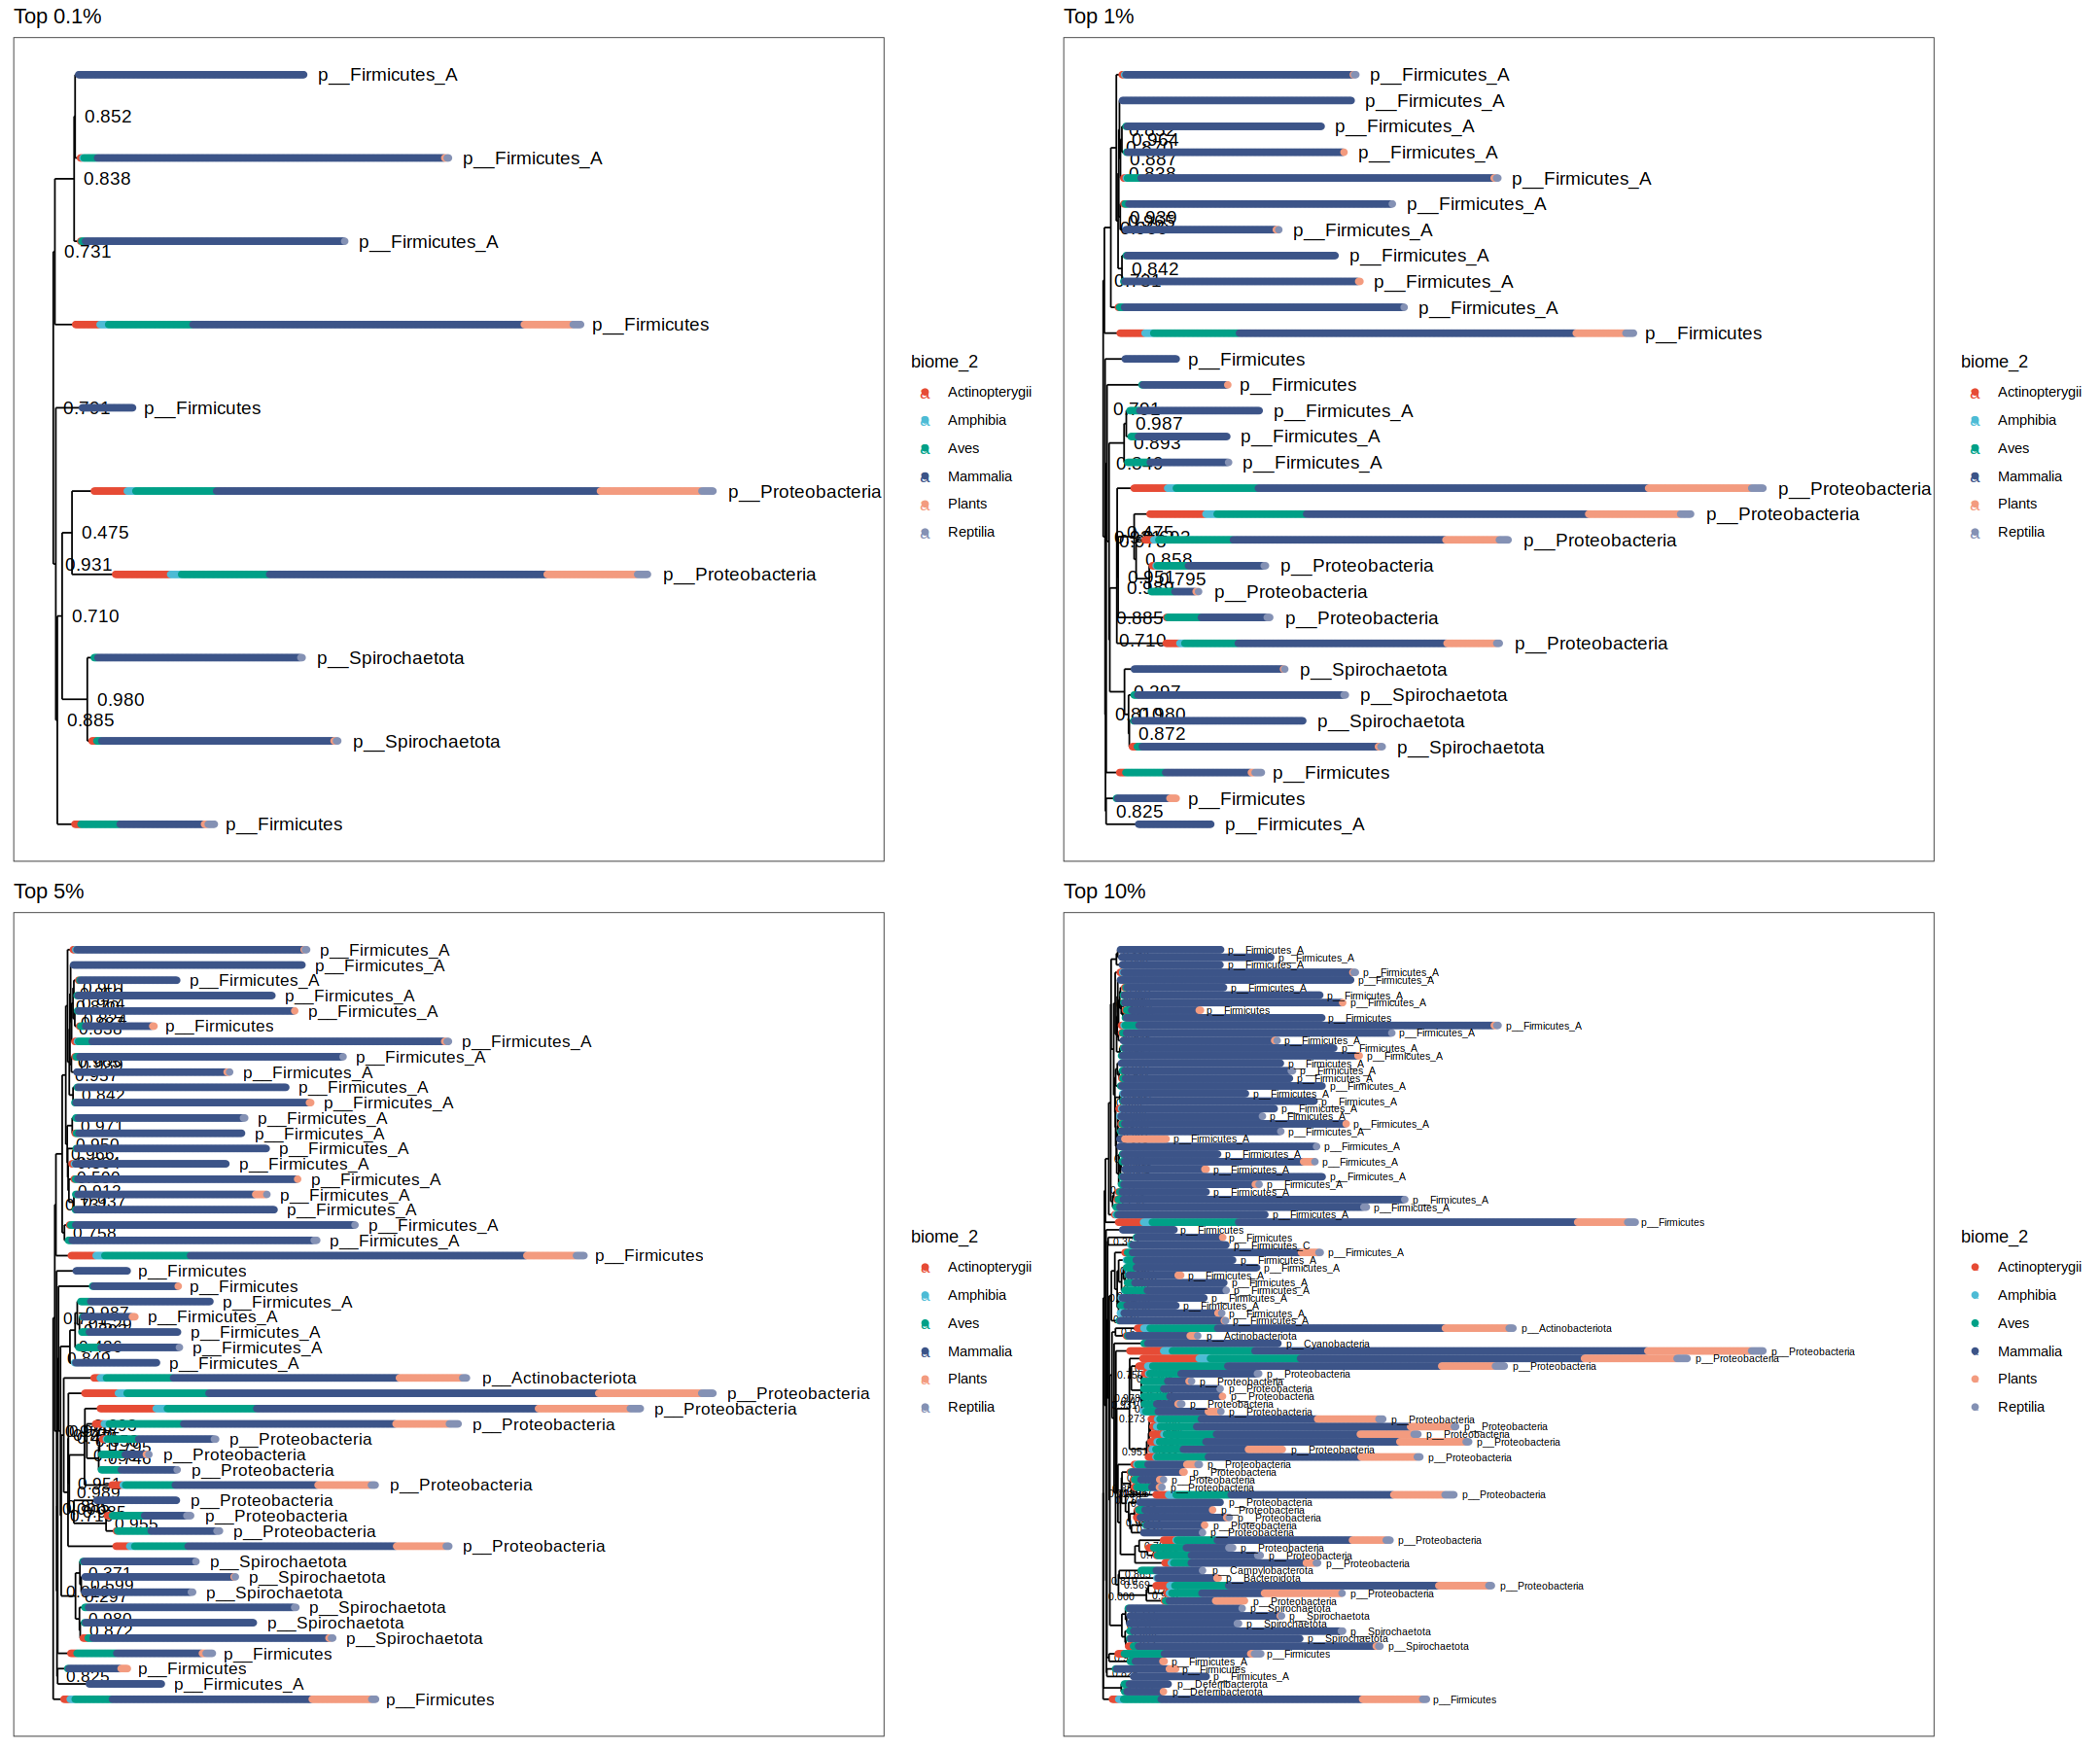

In [140]:
options(repr.plot.width=18,repr.plot.height=15)
grid.arrange(tre.host.top.0.1,
             tre.host.top.1,
             tre.host.top.5,
             tre.host.top.10,
             nrow=2)

In [ ]:
plot_net(subset.host, maxdist=0.4, color="biome_2", shape="category")

In [128]:
library(edgeR)

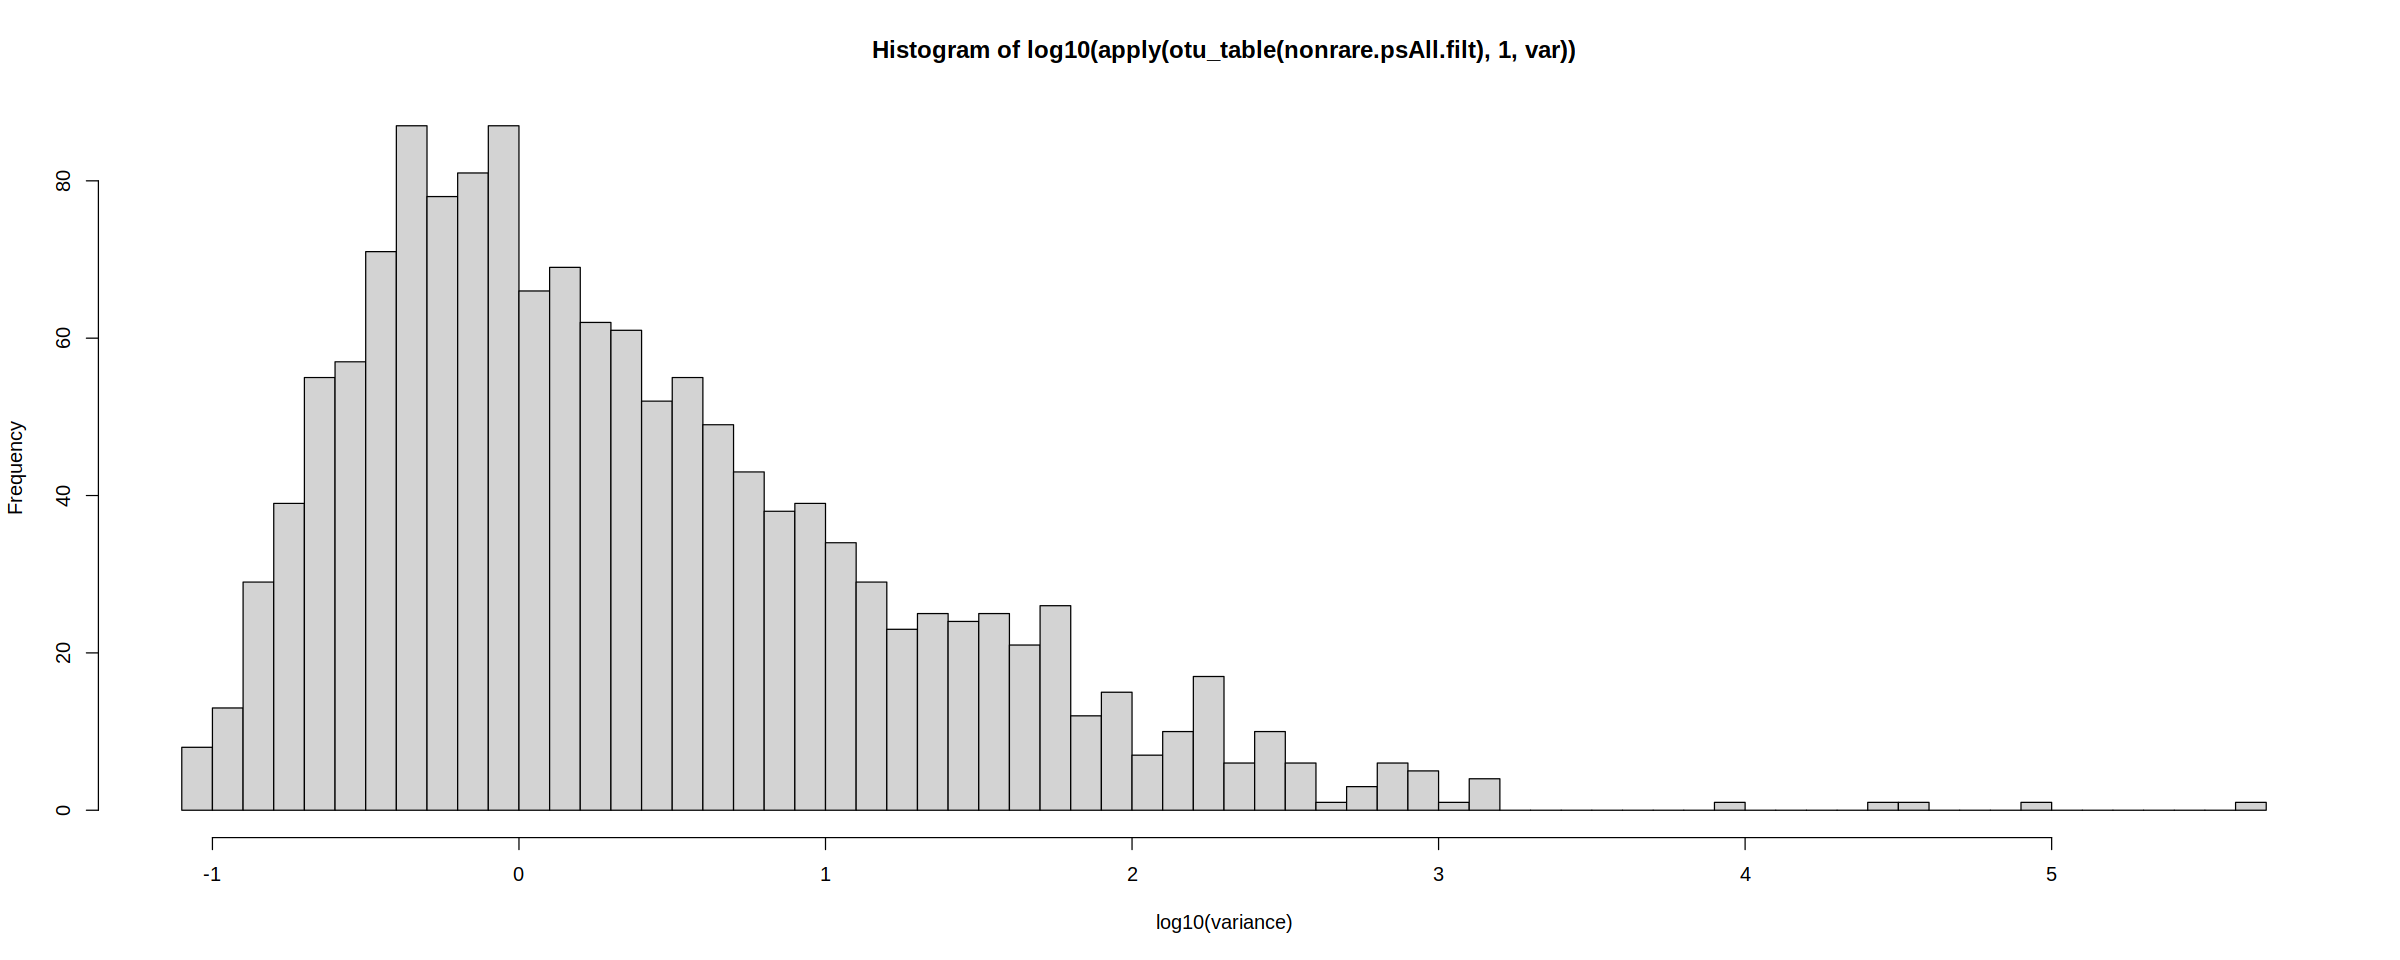

In [129]:
# #relative abundances
hist(log10(apply(otu_table(nonrare.psAll.filt), 1, var)),
     xlab="log10(variance)",breaks=50)#,
     #main="A large fraction of OTUs have very low variance")

In [130]:
################################################################################
#' Convert phyloseq OTU count data into DGEList for edgeR package
#' 
#' Further details.
#' 
#' @param physeq (Required).  A \code{\link{phyloseq-class}} or
#'  an \code{\link{otu_table-class}} object. 
#'  The latter is only appropriate if \code{group} argument is also a 
#'  vector or factor with length equal to \code{nsamples(physeq)}.
#'  
#' @param group (Required). A character vector or factor giving the experimental
#'  group/condition for each sample/library. Alternatively, you may provide
#'  the name of a sample variable. This name should be among the output of
#'  \code{sample_variables(physeq)}, in which case
#'  \code{get_variable(physeq, group)} would return either a character vector or factor.
#'  This is passed on to \code{\link[edgeR]{DGEList}},
#'  and you may find further details or examples in its documentation.
#'  
#' @param method (Optional). The label of the edgeR-implemented normalization to use.
#'  See \code{\link[edgeR]{calcNormFactors}} for supported options and details. 
#'  The default option is \code{"RLE"}, which is a scaling factor method 
#'  proposed by Anders and Huber (2010).
#'  At time of writing, the \link[edgeR]{edgeR} package supported 
#'  the following options to the \code{method} argument:
#'  
#'  \code{c("TMM", "RLE", "upperquartile", "none")}.
#'
#' @param ... Additional arguments passed on to \code{\link[edgeR]{DGEList}}
#' 
#' @examples
#' 
phyloseq_to_edgeR = function(physeq, group, method="RLE", ...){
  require("edgeR")
  require("phyloseq")
  # Enforce orientation.
  if( !taxa_are_rows(physeq) ){ physeq <- t(physeq) }
  x = as(otu_table(physeq), "matrix")
  # Add one to protect against overflow, log(0) issues.
  x = x + 1
  # Check `group` argument
  if( identical(all.equal(length(group), 1), TRUE) & nsamples(physeq) > 1 ){
    # Assume that group was a sample variable name (must be categorical)
    group = get_variable(physeq, group)
  }
  # Define gene annotations (`genes`) as tax_table
  taxonomy = tax_table(physeq, errorIfNULL=FALSE)
  if( !is.null(taxonomy) ){
    taxonomy = data.frame(as(taxonomy, "matrix"))
  } 
  # Now turn into a DGEList
  y = DGEList(counts=x, group=group, genes=taxonomy, remove.zeros = TRUE, ...)
  # Calculate the normalization factors
  z = calcNormFactors(y, method=method)
  # Check for division by zero inside `calcNormFactors`
  if( !all(is.finite(z$samples$norm.factors)) ){
    stop("Something wrong with edgeR::calcNormFactors on this data,
         non-finite $norm.factors, consider changing `method` argument")
  }
  # Estimate dispersions
  return(estimateTagwiseDisp(estimateCommonDisp(z)))
}
################################################################################

#### 1. Plants - Animals

In [335]:
subset.host

phyloseq-class experiment-level object
otu_table()   OTU Table:         [ 1454 taxa and 646 samples ]
sample_data() Sample Data:       [ 646 samples by 10 sample variables ]
tax_table()   Taxonomy Table:    [ 1454 taxa by 7 taxonomic ranks ]
phy_tree()    Phylogenetic Tree: [ 1454 tips and 1453 internal nodes ]

In [332]:
#nonrare.psAll.filt
subset.host.nonrare.filt= subset.host #subset_samples(nonrare.psAll.filt,biome_1=="Host-associated")
varianceThreshold = 1e-5
keepOTUs = names(which(apply(otu_table(subset.host.nonrare.filt), 1, var) > varianceThreshold))
filter_taxa_host.deseq.nonrare.filt = prune_taxa(keepOTUs, subset.host.nonrare.filt)

dge.host.nonrare.filt = phyloseq_to_edgeR(filter_taxa_host.deseq.nonrare.filt, group="category")

# Perform binary test
et.nonrare.filt.host = exactTest(dge.host.nonrare.filt)

# Extract values from test results
tt.nonrare.filt.host = topTags(et.nonrare.filt.host, n=nrow(dge.host.nonrare.filt$table), adjust.method="BH", sort.by="PValue")
res.nonrare.filt.host = tt.nonrare.filt.host@.Data[[1]]
alpha = 0.001
sigtab.host.nonrare.filt = res.nonrare.filt.host[(res.nonrare.filt.host$FDR < alpha), ]

#sigtab = cbind(as.numeric(sigtab, "data.frame"), as(tax_table(filter_taxa_All2.deseq)[rownames(sigtab), ], "matrix"))
#dim(sigtab)

sigtab.host.nonrare.filt=filter(res.nonrare.filt.host,FDR<0.01)

Found more than one class "phylo" in cache; using the first, from namespace 'phyloseq'

Also defined by ‘RNeXML’



In [334]:
nrow(sigtab.host.nonrare.filt)

[1] 353

In [134]:
head(tt.nonrare.filt.host)

Comparison of groups:  Plants-Animal 
                Domain            Phylum                  Class
SFH83235.1 d__Bacteria   p__Firmicutes_A          c__Clostridia
EHS53753.1 d__Bacteria p__Proteobacteria c__Alphaproteobacteria
RHP37040.1 d__Bacteria   p__Firmicutes_A          c__Clostridia
EFZ34977.1 d__Bacteria     p__Firmicutes             c__Bacilli
EIC00583.1 d__Bacteria  p__Spirochaetota        c__Spirochaetia
CDD46301.1 d__Bacteria   p__Firmicutes_A          c__Clostridia
                        Order              Family                 Genus
SFH83235.1  o__Lachnospirales  f__Lachnospiraceae g__Pseudobutyrivibrio
EHS53753.1     o__Rhizobiales     f__Rhizobiaceae      g__Allorhizobium
RHP37040.1  o__Lachnospirales  f__Lachnospiraceae      g__Acetatifactor
EFZ34977.1 o__Lactobacillales f__Lactobacillaceae  g__Ligilactobacillus
EIC00583.1  o__Treponematales  f__Treponemataceae        g__Treponema_D
CDD46301.1  o__Lachnospirales  f__Lachnospiraceae             g__CAG-95
                                     Species     logFC   logCPM        PValue
SFH83235.1 s__Pseudobutyrivibrio sp900113655  2.866737 11.62032 2.507641e-129
EHS53753.1      s__Allorhizobium sp000247475  2.621267 11.61165 3.236177e-106
RHP37040.1      s__Acetatifactor sp900066565 -4.736901 14.49443  3.400942e-30
EFZ34977.1      s__Ligilactobacillus ruminis -5.061193 14.75550  5.408759e-23
EIC00583.1     s__Treponema_D saccharophilum -3.086006 13.03417  2.831762e-22
CDD46301.1             s__CAG-95 sp000436115 -3.065621 12.99426  3.672979e-22
                     FDR
SFH83235.1 2.352167e-126
EHS53753.1 1.517767e-103
RHP37040.1  1.063361e-27
EFZ34977.1  1.268354e-20
EIC00583.1  5.312385e-20
CDD46301.1  5.742091e-20

#### Export list of Differentially Abundant flagellins

In [135]:
DA.animalsvsplants = rownames_to_column(sigtab.host.nonrare.filt,var = "Accession")
#write_tsv(DA.animalsvsplants,"edgeR/DA.animalvsplant.nonrare.filt.tsv")
head(DA.animalsvsplants)

Accession  Domain      Phylum            Class                 
1 SFH83235.1 d__Bacteria p__Firmicutes_A   c__Clostridia         
2 EHS53753.1 d__Bacteria p__Proteobacteria c__Alphaproteobacteria
3 RHP37040.1 d__Bacteria p__Firmicutes_A   c__Clostridia         
4 EFZ34977.1 d__Bacteria p__Firmicutes     c__Bacilli            
5 EIC00583.1 d__Bacteria p__Spirochaetota  c__Spirochaetia       
6 CDD46301.1 d__Bacteria p__Firmicutes_A   c__Clostridia         
  Order              Family              Genus                
1 o__Lachnospirales  f__Lachnospiraceae  g__Pseudobutyrivibrio
2 o__Rhizobiales     f__Rhizobiaceae     g__Allorhizobium     
3 o__Lachnospirales  f__Lachnospiraceae  g__Acetatifactor     
4 o__Lactobacillales f__Lactobacillaceae g__Ligilactobacillus 
5 o__Treponematales  f__Treponemataceae  g__Treponema_D       
6 o__Lachnospirales  f__Lachnospiraceae  g__CAG-95            
  Species                           logFC     logCPM   PValue       
1 s__Pseudobutyrivibrio sp900113655  2.866737 11.62032 2.507641e-129
2 s__Allorhizobium sp000247475       2.621267 11.61165 3.236177e-106
3 s__Acetatifactor sp900066565      -4.736901 14.49443  3.400942e-30
4 s__Ligilactobacillus ruminis      -5.061193 14.75550  5.408759e-23
5 s__Treponema_D saccharophilum     -3.086006 13.03417  2.831762e-22
6 s__CAG-95 sp000436115             -3.065621 12.99426  3.672979e-22
  FDR          
1 2.352167e-126
2 1.517767e-103
3  1.063361e-27
4  1.268354e-20
5  5.312385e-20
6  5.742091e-20

In [136]:
DA.animalsvsplants = mutate(DA.animalsvsplants,
                           Enriched_in=ifelse())

ERROR: [1m[33mError[39m in `mutate()`:[22m
[1m[22m[33m![39m Problem while computing `Enriched_in = ifelse()`.
[1mCaused by error in `ifelse()`:[22m
[33m![39m argument "test" is missing, with no default


In [243]:
theme_set(theme_bw())
sigtabgen.host.filt.nonrare = subset(sigtab.host.nonrare.filt, !is.na(Genus))

# Phylum order
x = tapply(sigtab.host.nonrare.filt$logFC, sigtab.host.nonrare.filt$Phylum, function(x) max(x))
x = sort(x, TRUE)
sigtabgen.host.filt.nonrare$Phylum = factor(as.character(sigtabgen.host.filt.nonrare$Phylum), levels = names(x))

# Genus order
x = tapply(sigtabgen.host.filt.nonrare$logFC, sigtabgen.host.filt.nonrare$Genus, function(x) max(x))
x = sort(x, TRUE)
sigtabgen.host.filt.nonrare$Genus = factor(as.character(sigtabgen.host.filt.nonrare$Genus), levels = names(x))
           
# Family order
x = tapply(sigtabgen.host.filt.nonrare$logFC, sigtabgen.host.filt.nonrare$Family, function(x) max(x))
x = sort(x, TRUE)
sigtabgen.host.filt.nonrare$Family = factor(as.character(sigtabgen.host.filt.nonrare$Family), levels = names(x))

#### Plots

##### A. Phlyum-level

Warning message:
“Duplicated aesthetics after name standardisation: xend”


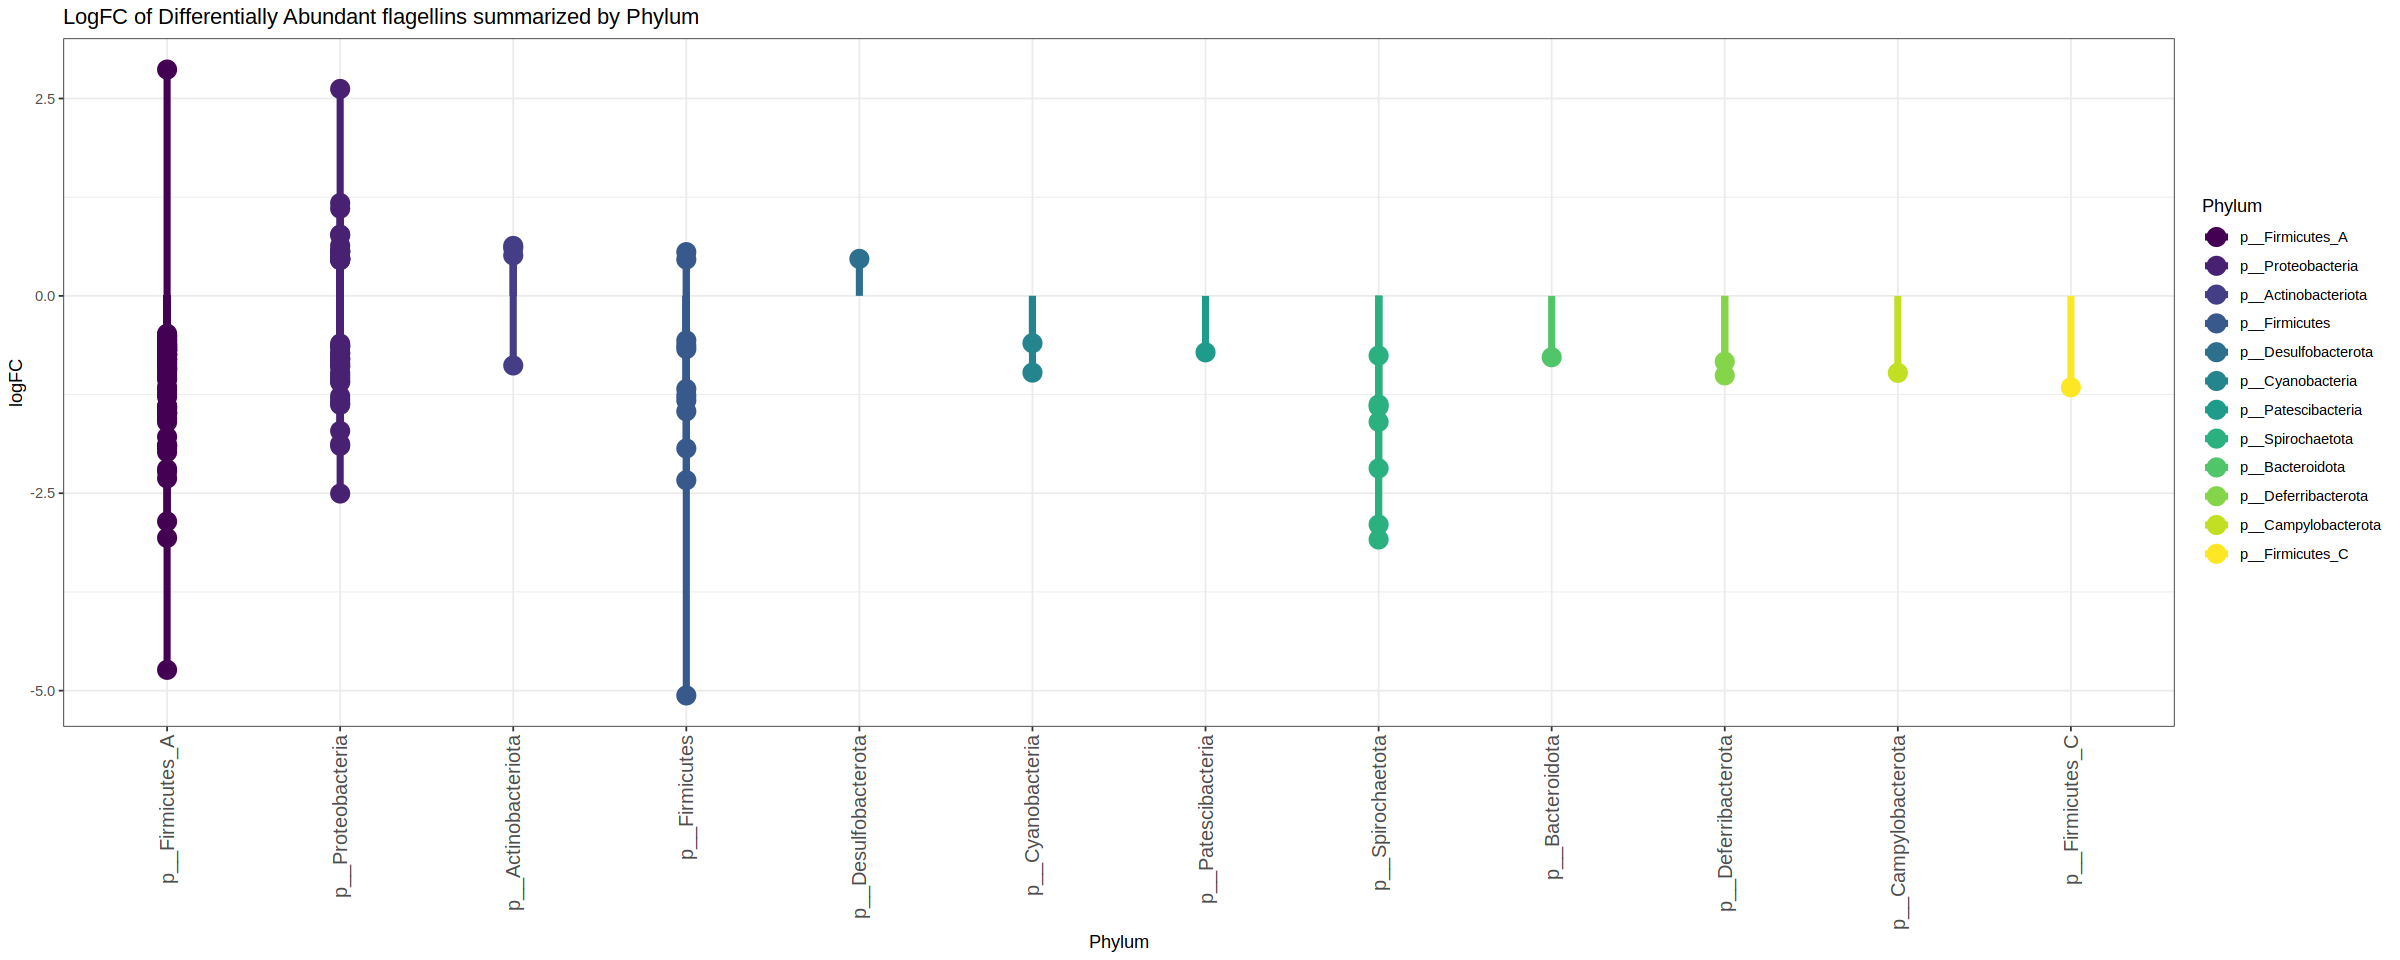

In [142]:
options(repr.plot.width=20,repr.plot.height=8)
ggplot(sigtabgen.host.filt.nonrare, aes(x = Phylum, y = logFC, color = Phylum)) + geom_point(size=5) + 
  geom_segment(aes(y=0,yend=logFC,xend=Phylum,xend=Phylum),size=2)+
  theme(axis.text.x = element_text(angle = 90, hjust = 1, vjust = 0.5, size=12))+
  scale_color_viridis_d()+
  ggtitle("LogFC of Differentially Abundant flagellins summarized by Phylum")

##### B. Family-level

Warning message:
“Duplicated aesthetics after name standardisation: xend”


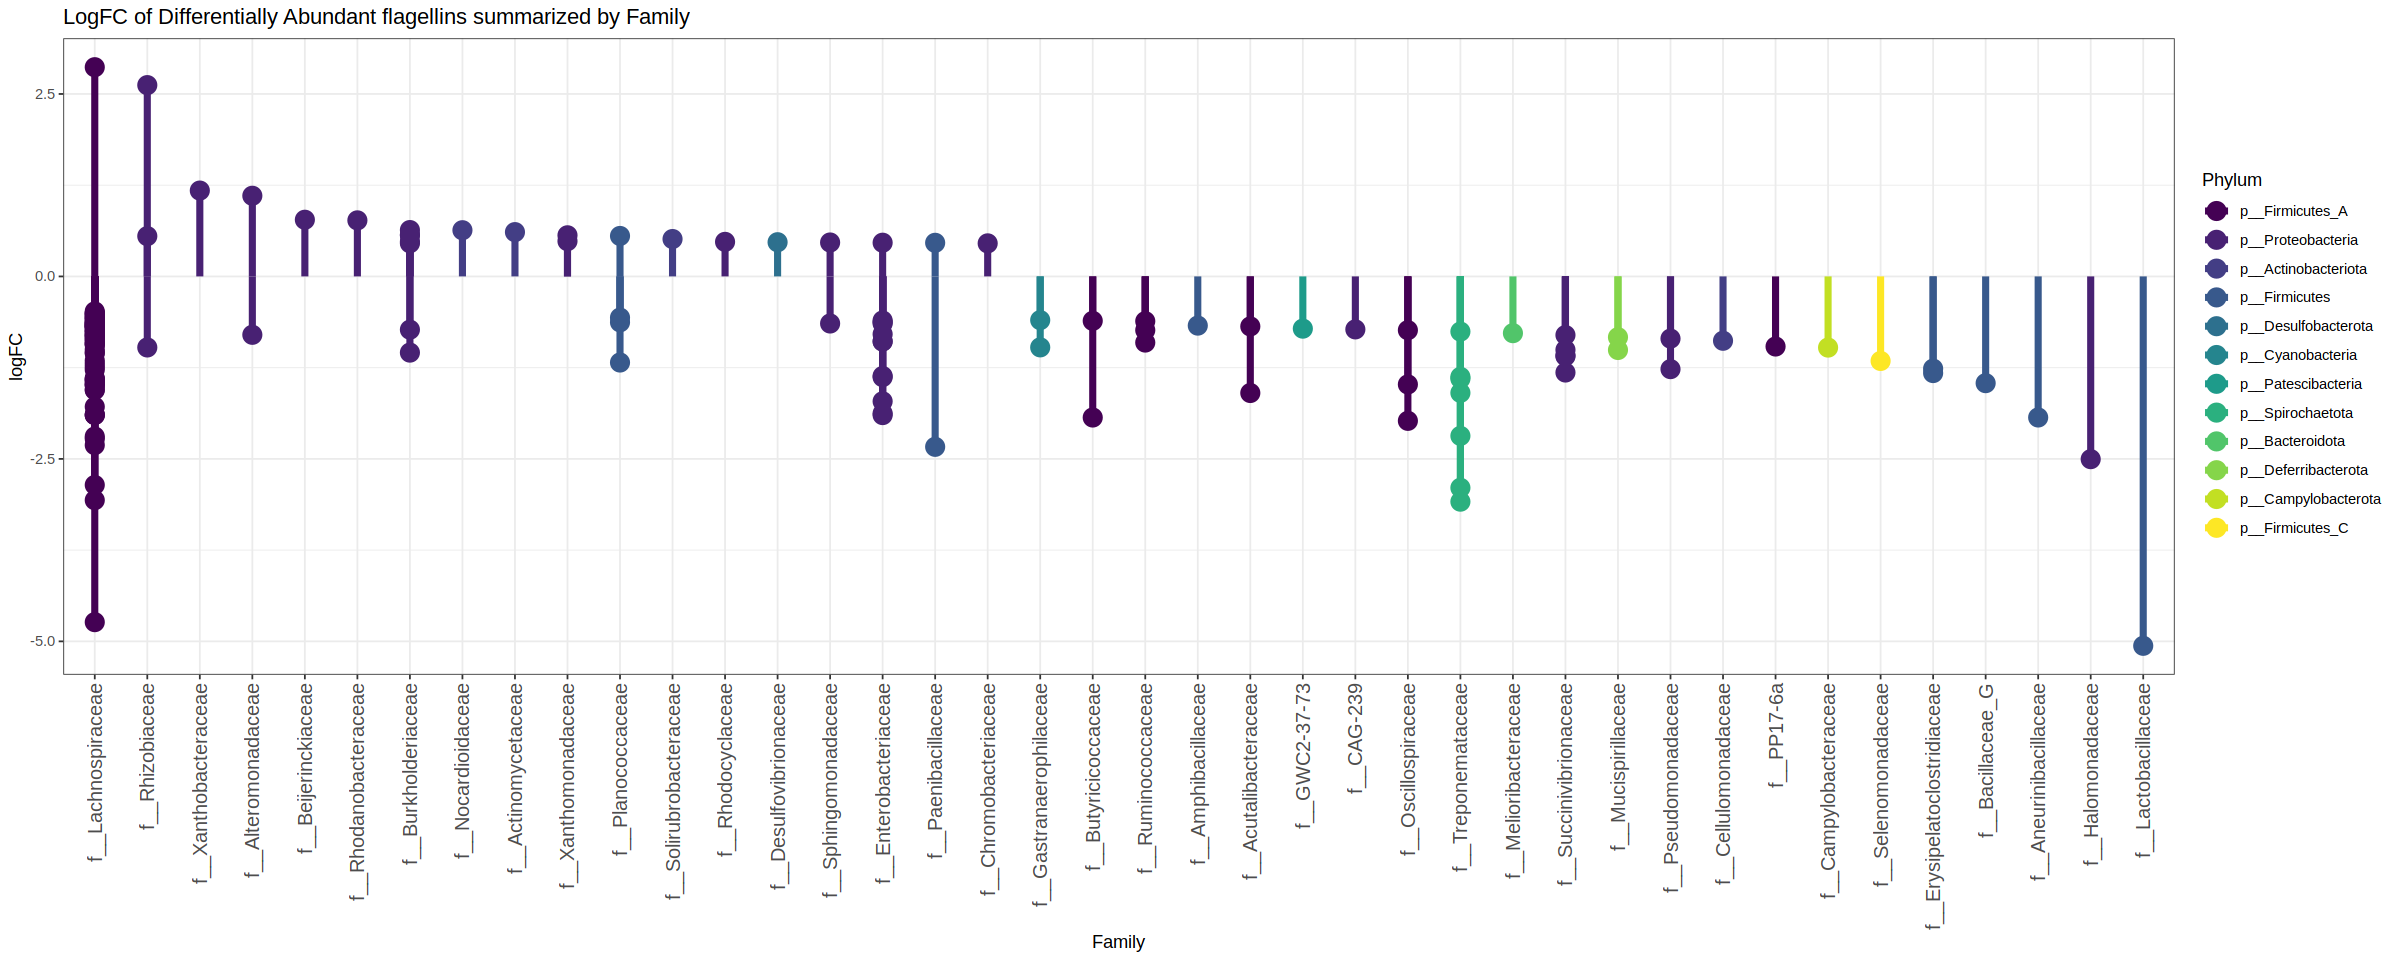

In [143]:
options(repr.plot.width=20,repr.plot.height=8)
ggplot(sigtabgen.host.filt.nonrare, aes(x = Family, y = logFC, color = Phylum)) + geom_point(size=5) + 
  geom_segment(aes(y=0,yend=logFC,xend=Family,xend=Family),size=2)+
  theme(axis.text.x = element_text(angle = 90, hjust = 1, vjust = 0.5, size=12))+
  scale_color_viridis_d()+
  ggtitle("LogFC of Differentially Abundant flagellins summarized by Family")

##### C. Genus-level

Warning message:
“Duplicated aesthetics after name standardisation: xend”


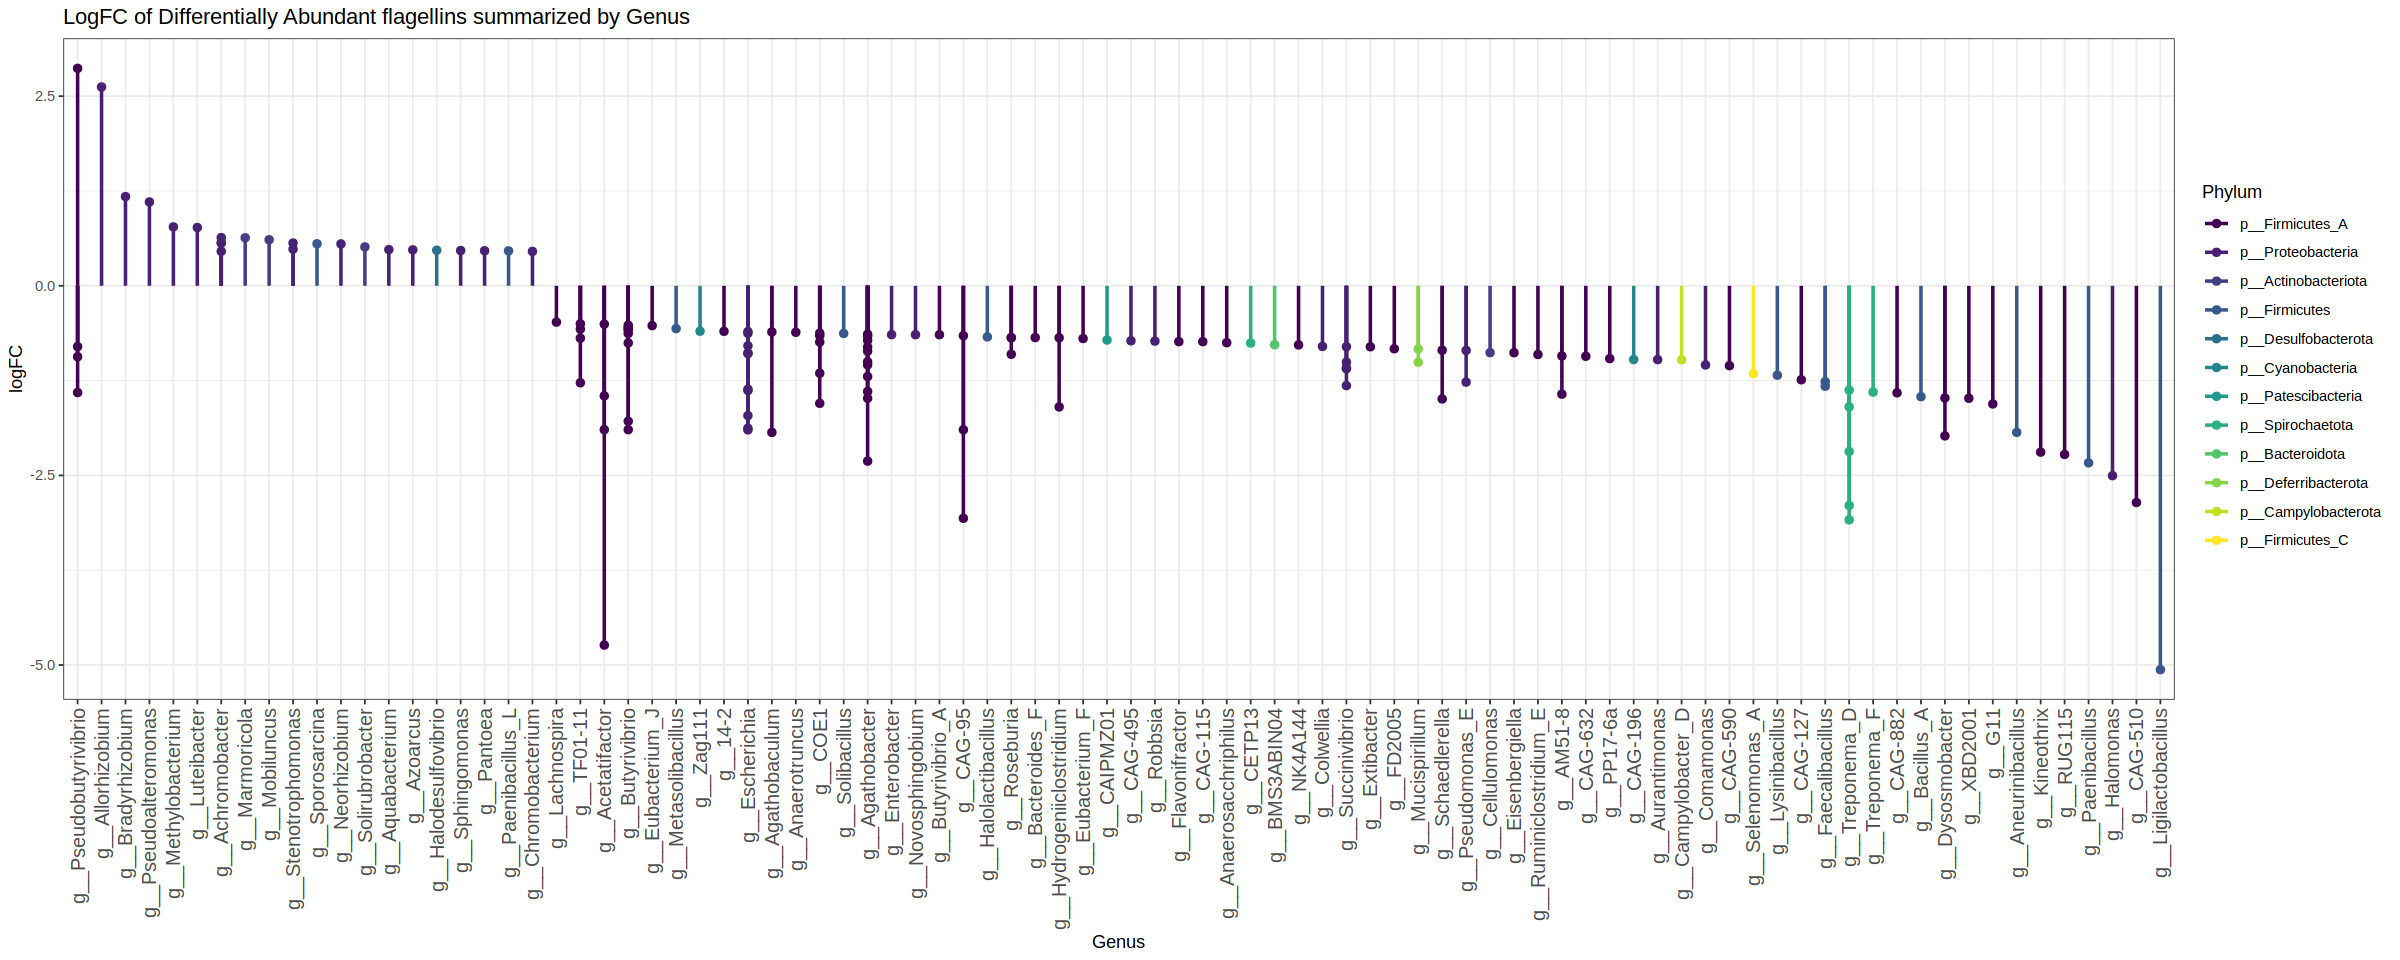

In [144]:
options(repr.plot.width=20,repr.plot.height=8)
ggplot(sigtabgen.host.filt.nonrare, aes(x = Genus, y = logFC, color = Phylum)) + geom_point(size=2) + 
  geom_segment(aes(y=0,yend=logFC,xend=Genus,xend=Genus),size=1)+
  theme(axis.text.x = element_text(angle = 90, hjust = 1, vjust = 0.5, size=12))+
  scale_color_viridis_d() +
  ggtitle("LogFC of Differentially Abundant flagellins summarized by Genus")

##### D. species-level

Warning message:
“Duplicated aesthetics after name standardisation: xend”


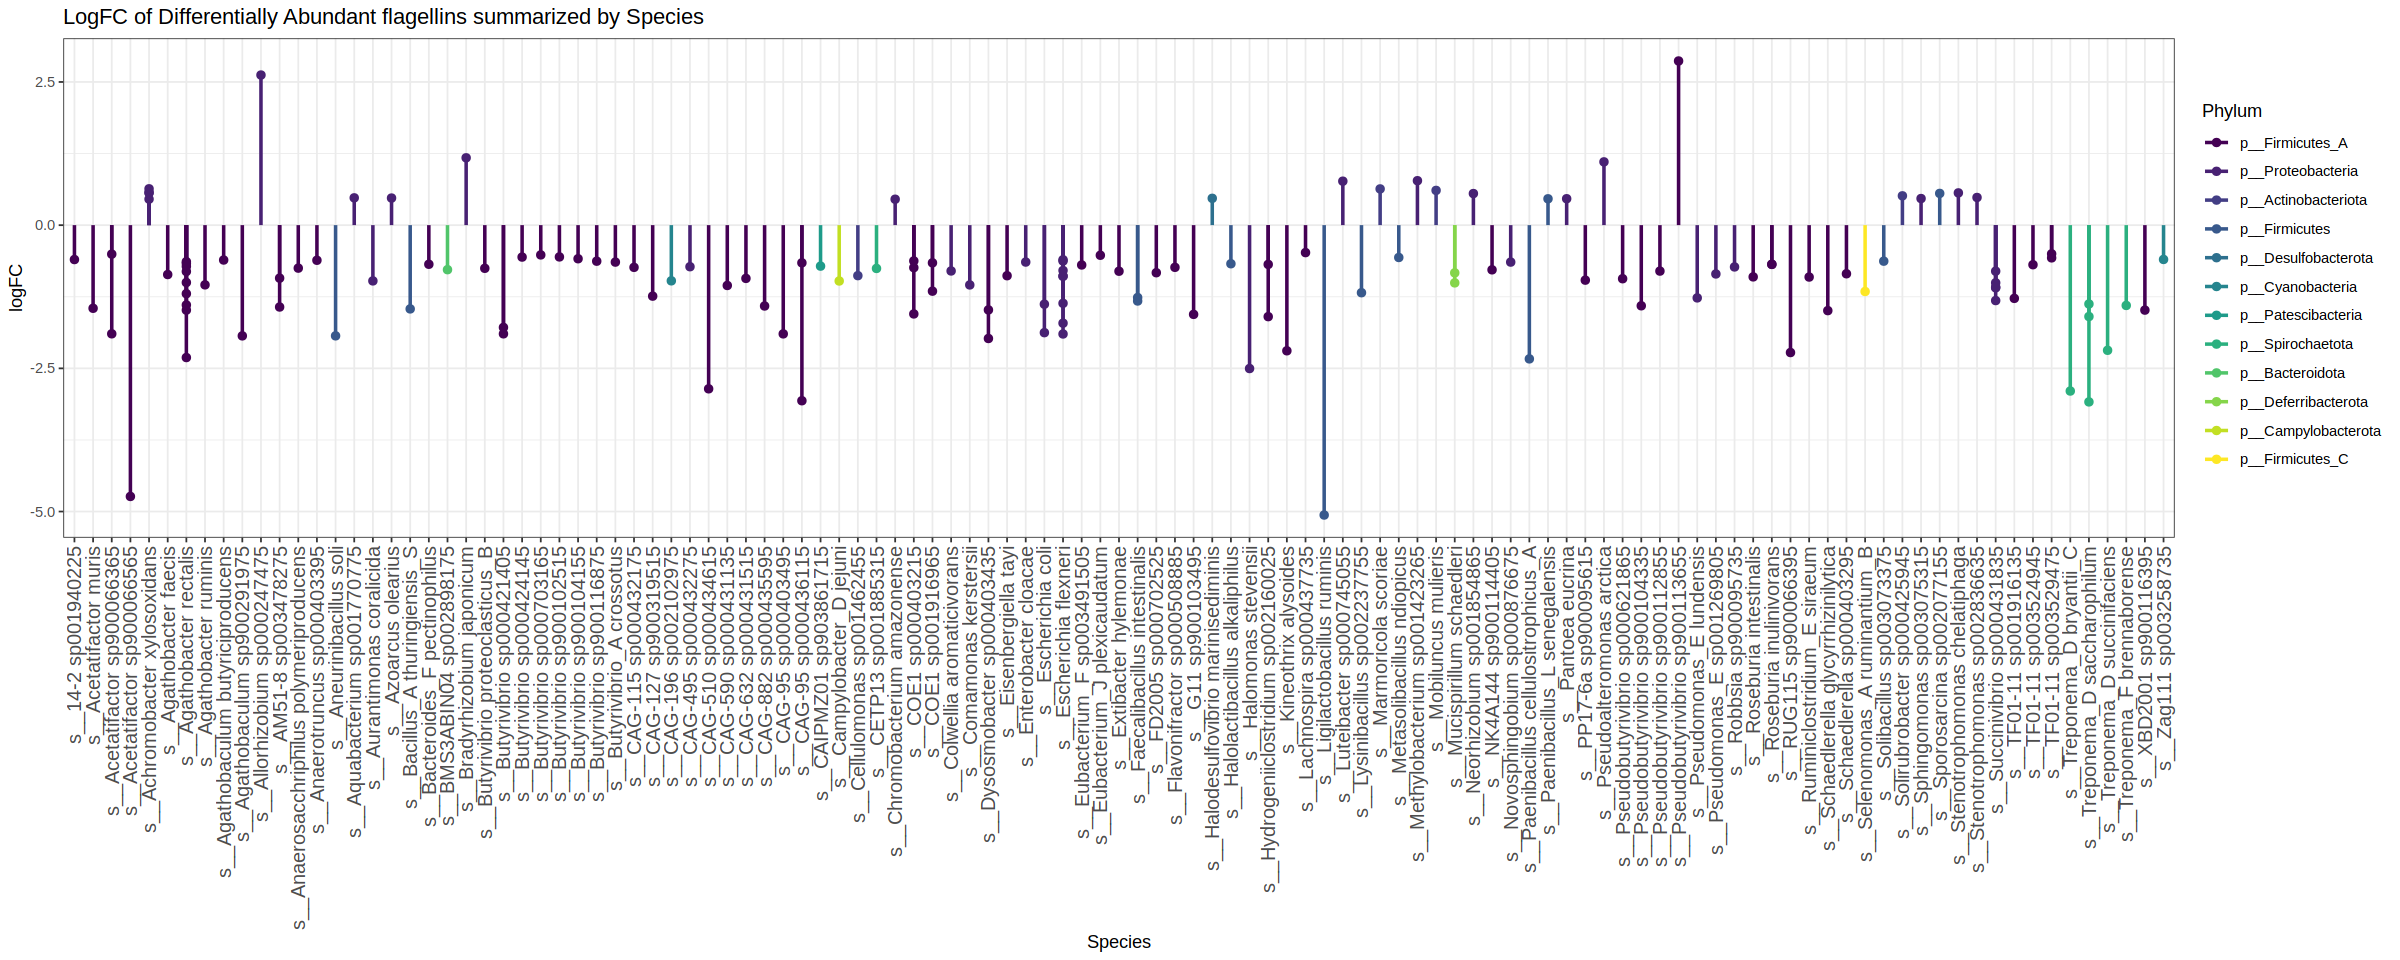

In [145]:
options(repr.plot.width=20,repr.plot.height=8)
ggplot(sigtabgen.host.filt.nonrare, aes(x = Species, y = logFC, color = Phylum)) + geom_point(size=2) + 
  geom_segment(aes(y=0,yend=logFC,xend=Species,xend=Species),size=1)+
  theme(axis.text.x = element_text(angle = 90, hjust = 1, vjust = 0.5, size=12))+
  scale_color_viridis_d()+
  ggtitle("LogFC of Differentially Abundant flagellins summarized by Species")

### Heatmap DAs animal-plants

#### Export list of Differentially Abundant flagellins

In [146]:
DAs.host=rownames(sigtab.host.nonrare.filt)
DAs_fla_host = prune_taxa(DAs.host,subset.host)
DAs_fla_host

Found more than one class "phylo" in cache; using the first, from namespace 'phyloseq'

Also defined by ‘RNeXML’



phyloseq-class experiment-level object
otu_table()   OTU Table:         [ 151 taxa and 646 samples ]
sample_data() Sample Data:       [ 646 samples by 10 sample variables ]
tax_table()   Taxonomy Table:    [ 151 taxa by 7 taxonomic ranks ]
phy_tree()    Phylogenetic Tree: [ 151 tips and 150 internal nodes ]

In [147]:
DAs_fla_host

phyloseq-class experiment-level object
otu_table()   OTU Table:         [ 151 taxa and 646 samples ]
sample_data() Sample Data:       [ 646 samples by 10 sample variables ]
tax_table()   Taxonomy Table:    [ 151 taxa by 7 taxonomic ranks ]
phy_tree()    Phylogenetic Tree: [ 151 tips and 150 internal nodes ]

In [148]:
count(DAs_fla_host@sam_data,category)

$category
[1] "Animal" "Plants"

$n
[1] 559  87

attr(,"row.names")
[1] 1 2
attr(,".S3Class")
[1] "data.frame"
attr(,"class")
[1] "sample_data"
attr(,"class")attr(,"package")
[1] "phyloseq"

In [149]:
library(pheatmap)

#### Create function to map color to annotation

In [150]:
mapBiomeToColor<-function(annotations){
    colorsVector = ifelse(annotations["category"]=="Plants", 
        "darkcyan", ifelse(annotations["category"]=="Animal", 
        "coral", "red"))
    return(colorsVector)
}

#### Create data.frame with metadata annotations

In [151]:
annotation.host <- data.frame(sample=DAs_fla_host@sam_data$Sample,
                        biome2=DAs_fla_host@sam_data$biome_2,
                        category=DAs_fla_host@sam_data$category)
rownames(annotation.host)=annotation.host$sample

sampleColors.host = mapBiomeToColor(annotation.host)

#### Create colors vector based on annotations

In [152]:
cols.vector.host =(t(sampleColors.host))
cols.vector.host = sampleColors.host[2:nrow(sampleColors.host),]

In [153]:
annotation.col = select(annotation.host,-sample)

In [154]:
annotation.row=data.frame(DAs_fla_host@tax_table)

#### Create abundance matrix for heatmap

In [155]:
matrix.host=as.matrix(DAs_fla_host@otu_table[,2:ncol(DAs_fla_host@otu_table)])
rownames(matrix.host)=rownames(DAs_fla_host@otu_table)

Mt2_GH<-log((matrix.host*1000)+1)

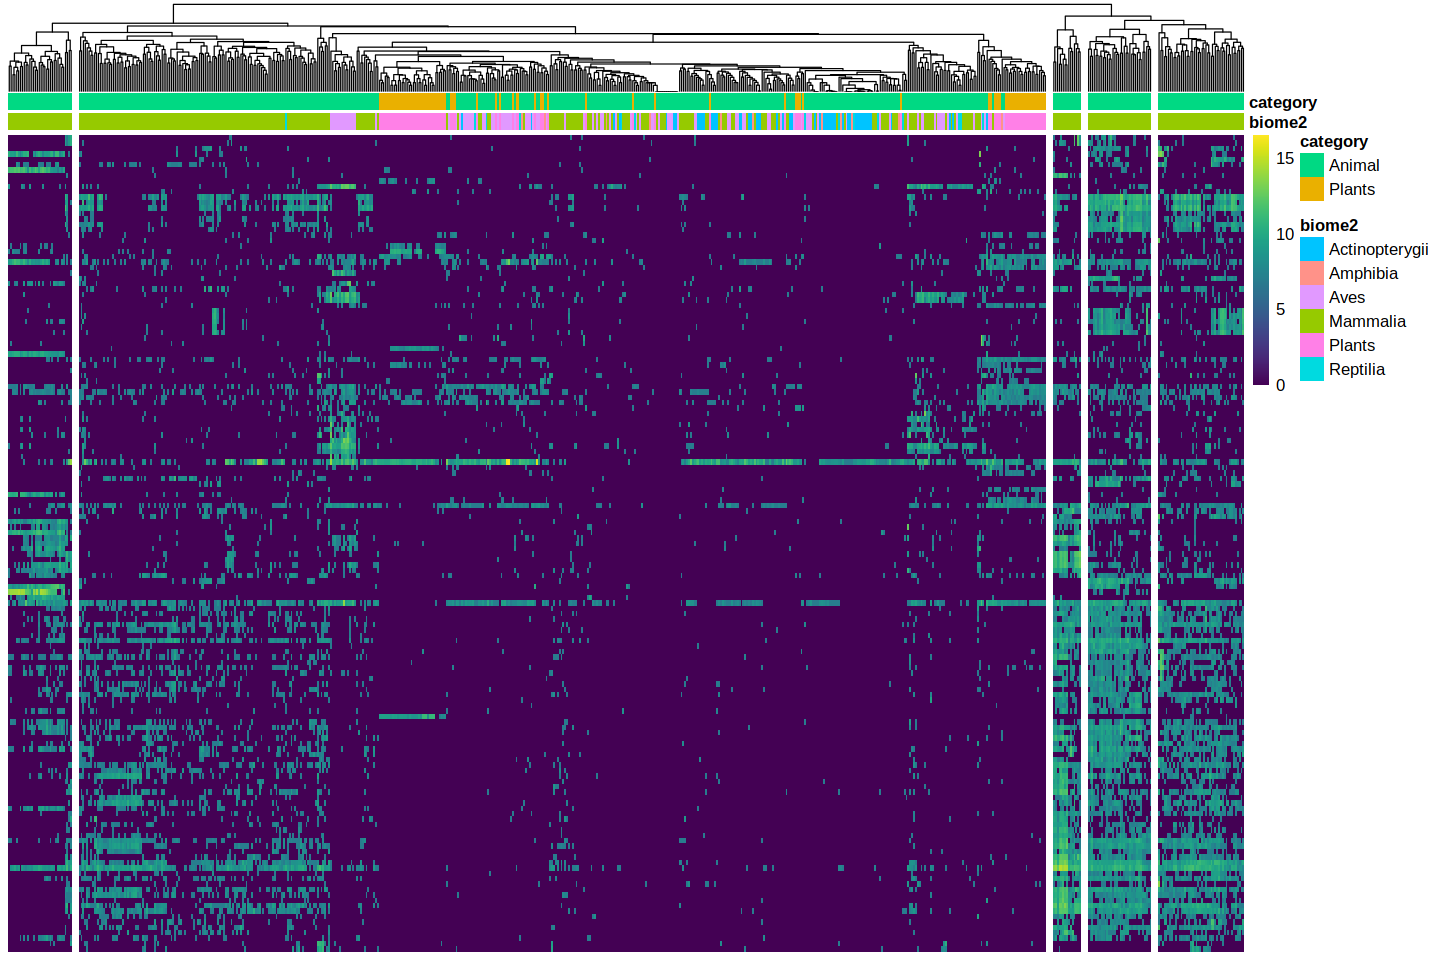

In [156]:
options(repr.plot.width=15,repr.plot.width=12)
pheatmap(Mt2_GH, cutree_cols = 5,
         cluster_cols=TRUE,
         cluster_rows=FALSE,
         show_rownames=F,
         show_colnames=F,
         labels_row=annotation.row$Phylum,
         annotation_col=annotation.col,
          color = viridis(n = 256, alpha = 1, 
                                   begin = 0, end = 1, option = "viridis")
)

#### OTU tree of DA taxa

In [157]:
tre.DA.firm=plot_tree(subset_taxa(DAs_fla_host,Phylum==c("p__Firmicutes_A","p__Firmicutes_C","p__Firmicutes")),color="mammals", label.tips="Species", ladderize="left", nodelabf=nodeplotboot())+scale_color_npg()

tre.DA.proteo=plot_tree(subset_taxa(DAs_fla_host,Phylum=="p__Proteobacteria"),color="mammals",label.tips="Species",ladderize="left",nodelabf=nodeplotboot())+scale_color_npg()

Warning message in Phylum == c("p__Firmicutes_A", "p__Firmicutes_C", "p__Firmicutes"):
“longer object length is not a multiple of shorter object length”
Found more than one class "phylo" in cache; using the first, from namespace 'phyloseq'

Also defined by ‘RNeXML’

Found more than one class "phylo" in cache; using the first, from namespace 'phyloseq'

Also defined by ‘RNeXML’

Found more than one class "phylo" in cache; using the first, from namespace 'phyloseq'

Also defined by ‘RNeXML’

Found more than one class "phylo" in cache; using the first, from namespace 'phyloseq'

Also defined by ‘RNeXML’

Warning message in psmelt(physeq):
“The sample variables: 
Sample
 have been renamed to: 
sample_Sample
to avoid conflicts with special phyloseq plot attribute names.”
Found more than one class "phylo" in cache; using the first, from namespace 'phyloseq'

Also defined by ‘RNeXML’

Found more than one class "phylo" in cache; using the first, from namespace 'phyloseq'

Also defined by ‘RNeX

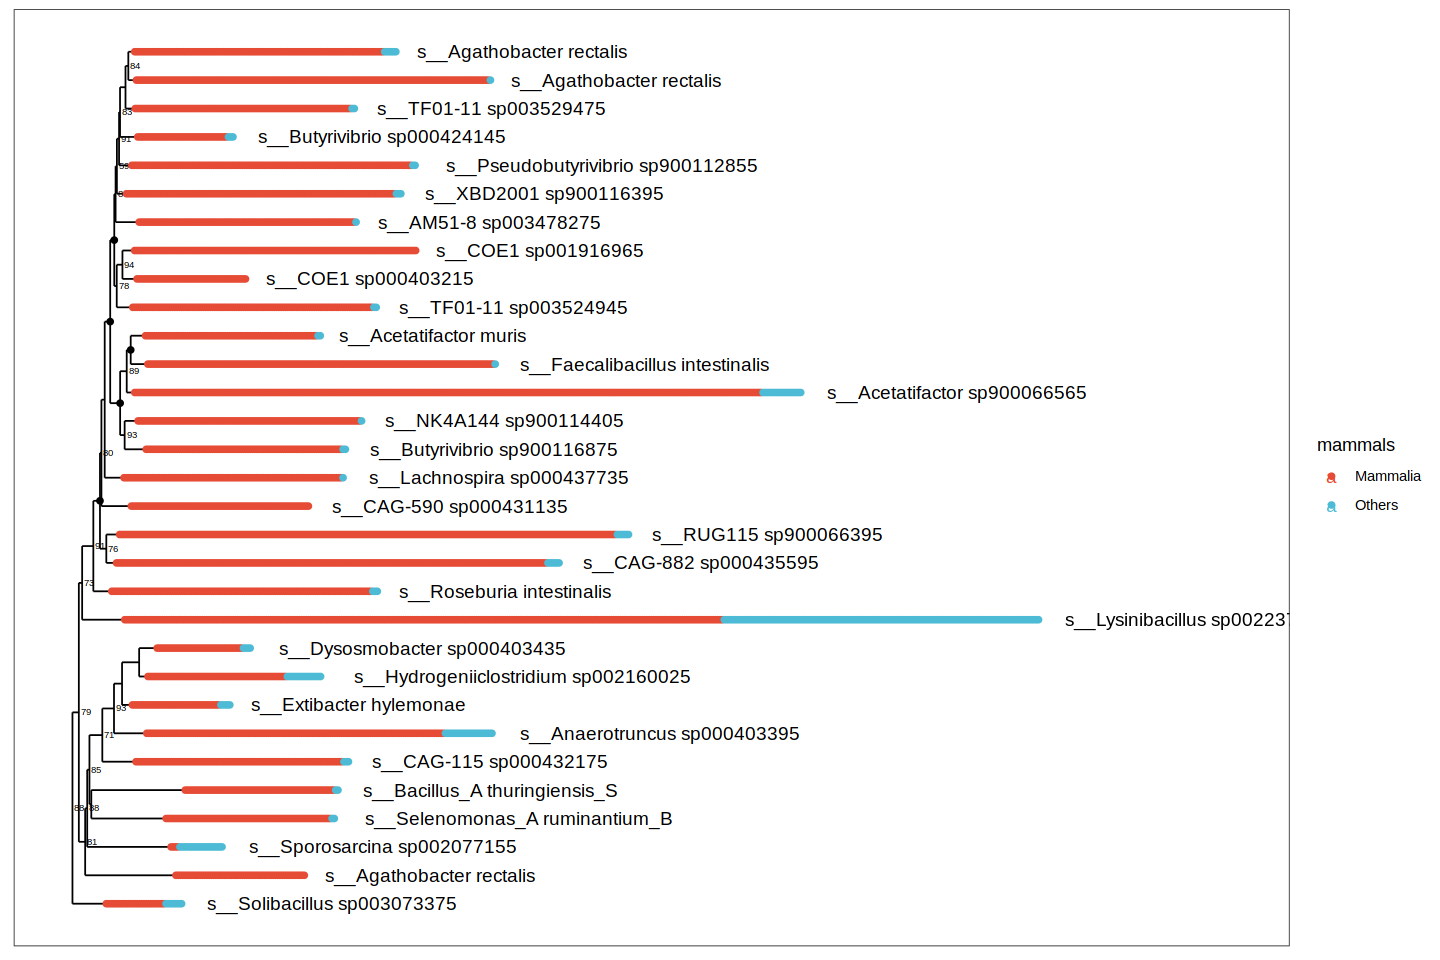

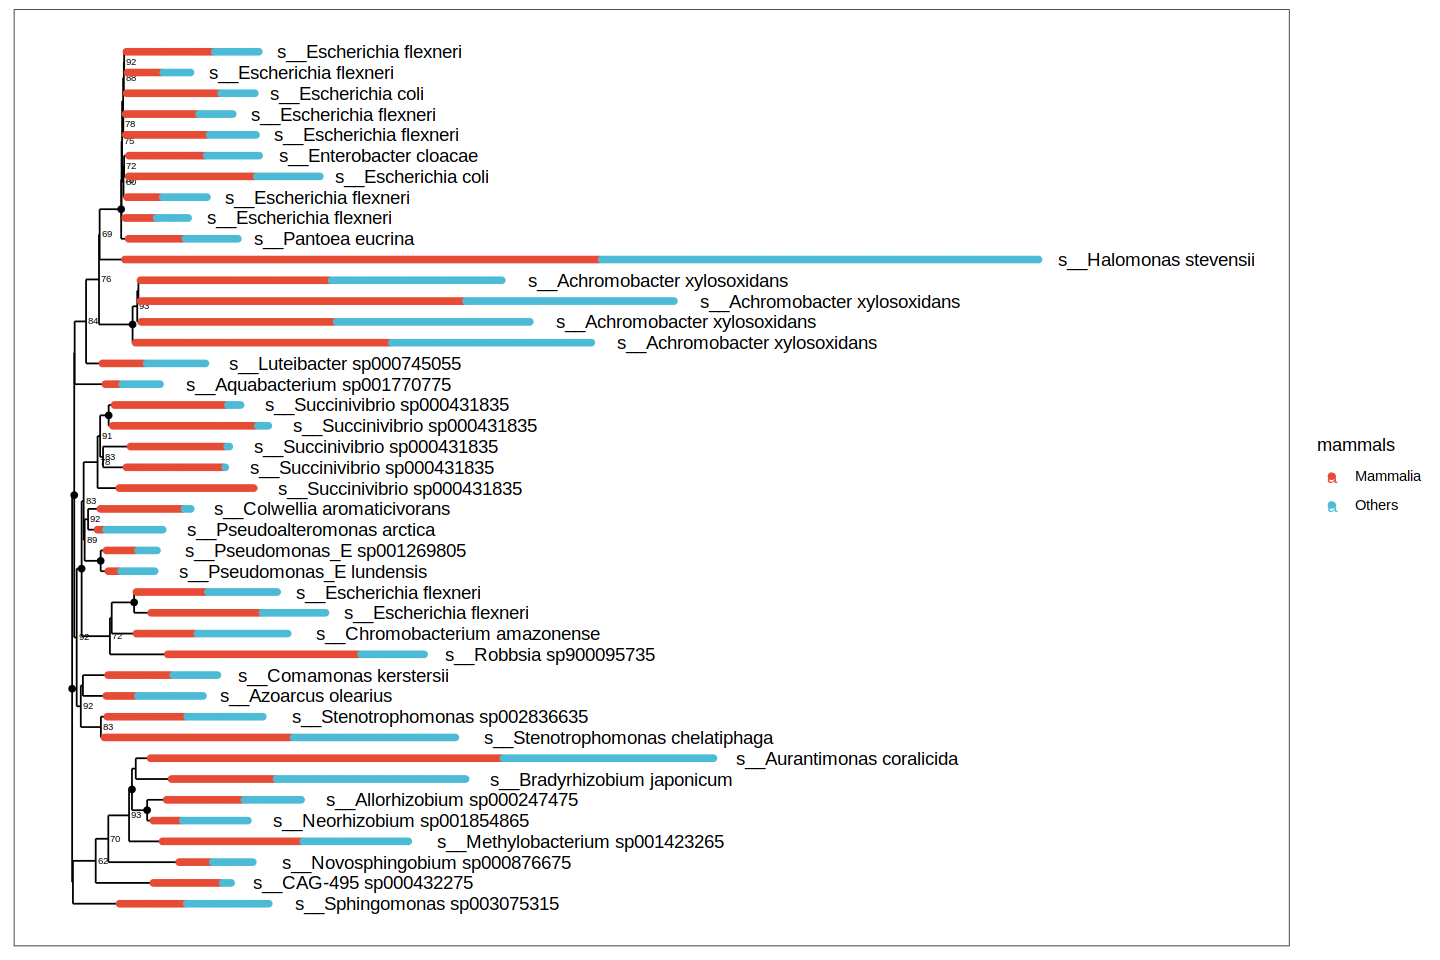

In [158]:
tre.DA.firm
tre.DA.proteo

## Vertebrates

In [160]:
count(subset.host@sam_data,biome_2)

$biome_2
[1] "Actinopterygii" "Amphibia"       "Aves"           "Mammalia"      
[5] "Plants"         "Reptilia"      

$n
[1]  51  11  96 387  87  14

attr(,"row.names")
[1] 1 2 3 4 5 6
attr(,".S3Class")
[1] "data.frame"
attr(,"class")
[1] "sample_data"
attr(,"class")attr(,"package")
[1] "phyloseq"

In [336]:
sessionInfo()

R version 4.2.2 (2022-10-31)
Platform: x86_64-conda-linux-gnu (64-bit)
Running under: Ubuntu 20.04.6 LTS

Matrix products: default
BLAS/LAPACK: /ebio/abt3_projects2/Flagellin_Diversity/miniconda/envs/py3_fla_2022/lib/libopenblasp-r0.3.21.so

locale:
 [1] LC_CTYPE=C.UTF-8       LC_NUMERIC=C           LC_TIME=C.UTF-8       
 [4] LC_COLLATE=C.UTF-8     LC_MONETARY=C.UTF-8    LC_MESSAGES=C.UTF-8   
 [7] LC_PAPER=C.UTF-8       LC_NAME=C              LC_ADDRESS=C          
[10] LC_TELEPHONE=C         LC_MEASUREMENT=C.UTF-8 LC_IDENTIFICATION=C   

attached base packages:
[1] grid      stats     graphics  grDevices utils     datasets  methods  
[8] base     

other attached packages:
 [1] pheatmap_1.0.12   edgeR_3.40.2      limma_3.54.2      cowplot_1.1.1    
 [5] phyloseq_1.42.0   knitr_1.40        ape_5.7-1         vegan_2.6-4      
 [9] lattice_0.20-45   permute_0.9-7     gridExtra_2.3     conflicted_1.2.0 
[13] viridis_0.6.2     viridisLite_0.4.1 ggsci_3.0.0       phylosignal_1.3  
[17] me